# Análise Exploratória do Bootcamp

Neste notebook será feito uma análise exploratória do dataset fornecido para fazer 

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import plotly.express as px

In [2]:
# dados sem tratamento
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de train.tsv',
                 sep='\t')
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
# Dados com tratamento
df_tra = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de train_data_prep01.csv')
df_tra.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
0,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,3,NaN,10.0,1,No description yet,18-6-2018,27
1,razer blackwidow chroma keyboard,Electronics,Computers & Tablets,Components & Parts,3,Razer,52.0,0,This keyboard is in great condition and works ...,18-3-2018,15
2,ava viv blouse,Women,Tops & Blouses,Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,26-10-2018,14
3,leather horse statues,Home,Home Décor,Home Décor Accents,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,21-2-2018,1
4,24k gold plated rose,Women,Jewelry,Necklaces,1,NaN,44.0,0,Complete with certificate of authenticity,17-4-2018,13


### Dicionário de dados

- **train_id** or **test_id**: o id da lista

- **name**: o título da listagem. Observe que limpamos os dados para remover textos que parecem preços (por exemplo, US$ 20) para evitar vazamentos. Esses preços removidos são representados como rm.

- **item_condition_id**:Condição do item provido pelo vendedor.
- **category_name**: Categoria da Lista.
- **brand_name**: Não foi fornecido pelo kaggle, mas acredito que seja o nome da marca.
- **price**: O preço pelo qual o item foi vendido. Esta é a variável de destino que você irá prever. A unidade é USD. Esta coluna não existe em test.tsv, pois é isso que você irá prever.
- **shipping**: 1 se a taxa de envio for paga pelo vendedor e 0 pelo comprador.
- **item_description**: Descrição completa do produto. Observe que limpamos os dados para remover textos que parecem preços (por exemplo, US$ 20) para evitar vazamentos. Esses preços removidos são representados como rm.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [5]:
df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [6]:
df = df[df['price']>0]

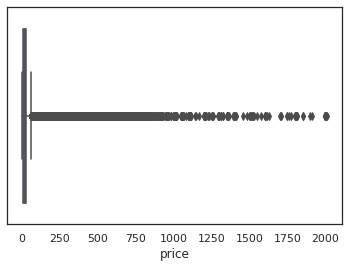

In [7]:
sns.boxplot(x='price',data=df)

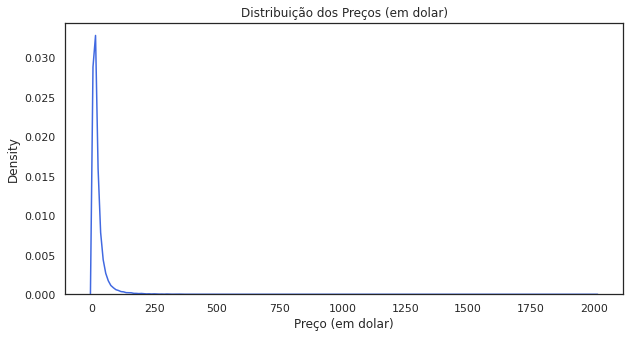

In [8]:
plt.figure(figsize=(10,5))
plt.title('Distribuição dos Preços (em dolar)')
sns.kdeplot(x='price',data=df,color='royalblue')
plt.xlabel('Preço (em dolar)');

In [9]:
print('Média do Preço',np.mean(df['price']))
print('Preço Minimo',np.min(df['price']))
print('Mediana',np.median(df['price']))
print('Preço Máximo',np.max(df['price']))
print('Desvio Padrão',np.std(df['price']))

Média do Preço 26.753288032822624
Preço Minimo 3.0
Mediana 17.0
Preço Máximo 2009.0
Desvio Padrão 38.59196574202071


In [10]:
df['brand_name'] = df['brand_name'].str.lower()

In [11]:
df['item_description'] = df['item_description'].str.lower()

In [12]:
df['item_description'].value_counts(dropna=False)[0:30]

no description yet      82432
new                      4351
brand new                3803
good condition           1410
great condition          1299
nwt                      1141
like new                 1122
never worn                960
new with tags             723
never used                683
excellent condition       670
worn once                 661
brand new with tags       615
size small                599
bnwt                      567
brand new!                553
new in box                498
nwot                      472
reserved                  467
free shipping             463
size medium               458
bundle                    442
brand new.                427
brand new never used      415
in good condition         370
size large                357
brand new never worn      336
euc                       315
brand new in box          306
on hold                   303
Name: item_description, dtype: int64

In [13]:
df['brand_name'].value_counts()[0:30]

pink                 54072
nike                 54006
victoria's secret    48011
lularoe              30995
apple                17314
forever 21           15178
nintendo             14998
lululemon            14550
michael kors         13916
american eagle       13245
rae dunn             12300
sephora              12164
coach                10458
disney               10352
bath & body works    10350
adidas               10195
funko                 9233
under armour          8458
sony                  7992
old navy              7561
hollister             6944
carter's              6380
urban decay           6206
the north face        6168
independent           5900
too faced             5791
xbox                  5707
brandy melville       5677
kate spade            5409
mac                   5302
Name: brand_name, dtype: int64

In [14]:
marca = df['brand_name'].value_counts()[0:30]
marca = pd.DataFrame(list(marca),index=df['brand_name'].value_counts().index[0:30],
                 columns=['quantidade'])
marca = marca.reset_index()
marca

,index,quantidade
0,pink,54072
1,nike,54006
2,victoria's secret,48011
3,lularoe,30995
4,apple,17314
5,forever 21,15178
6,nintendo,14998
7,lululemon,14550
8,michael kors,13916
9,american eagle,13245


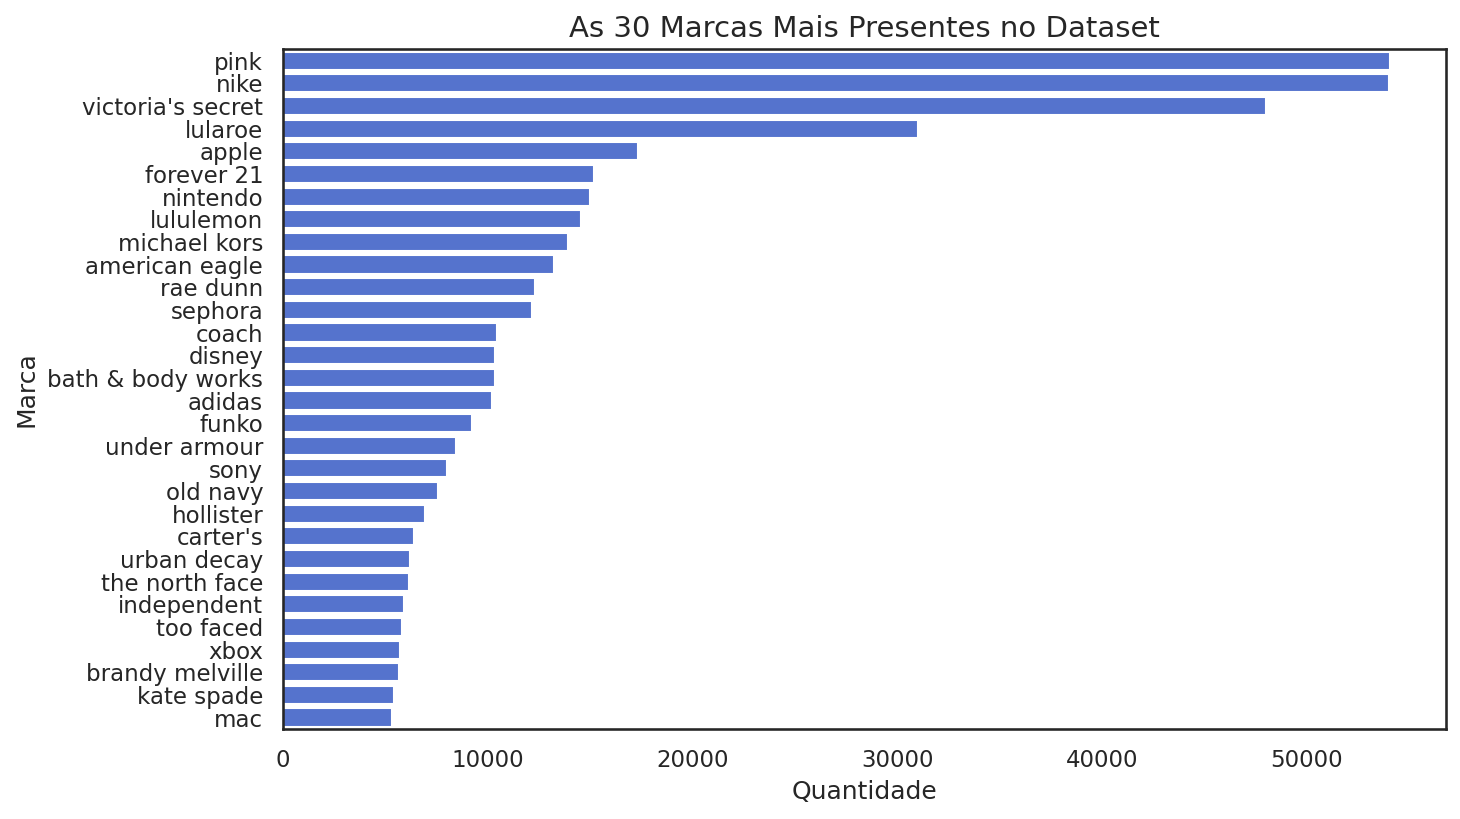

In [15]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('As 30 Marcas Mais Presentes no Dataset',fontsize=14)
sns.barplot(y='index',x='quantidade',data=marca,color='royalblue')
plt.ylabel('Marca')
plt.xlabel('Quantidade');

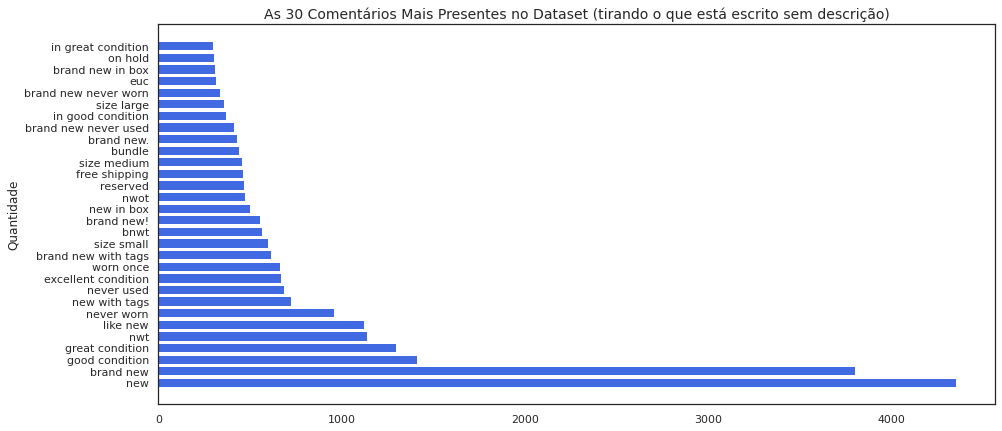

In [16]:
plt.figure(figsize=(15,7))
plt.title('As 30 Comentários Mais Presentes no Dataset (tirando o que está escrito sem descrição)',fontsize=14)
plt.barh(df['item_description'].value_counts().index[1:31],
         df['item_description'].value_counts()[1:31],color='royalblue')
plt.ylabel('Comentário')
plt.ylabel('Quantidade');

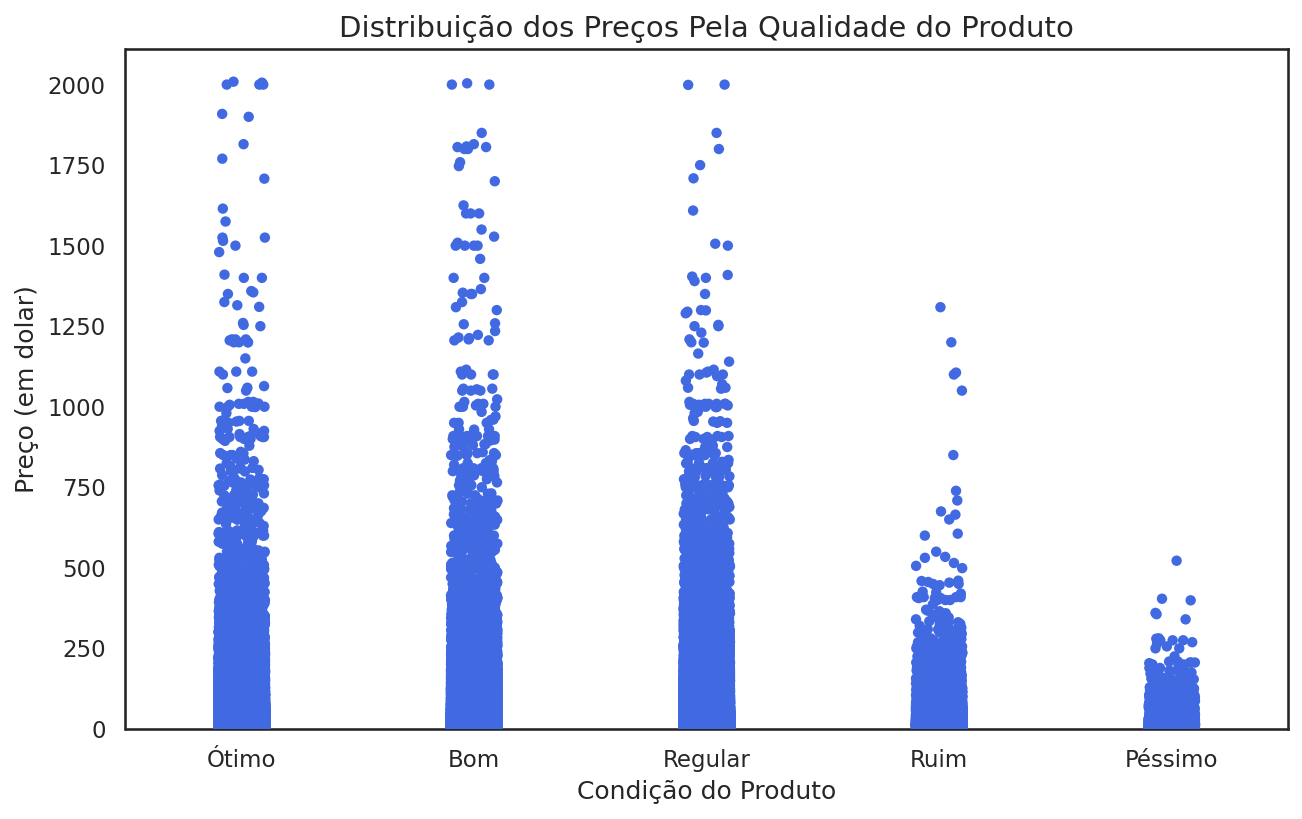

In [17]:
plt.figure(figsize=(10,6),dpi=150)
sns.stripplot(x='item_condition_id',y='price',data=df,color='royalblue')
plt.title('Distribuição dos Preços Pela Qualidade do Produto',fontsize=14)
plt.ylabel('Preço (em dolar)')
plt.xlabel('Condição do Produto')
ticks, labels = plt.xticks()
plt.xticks(ticks,labels=['Ótimo','Bom','Regular','Ruim','Péssimo'])
plt.ylim(bottom=0);

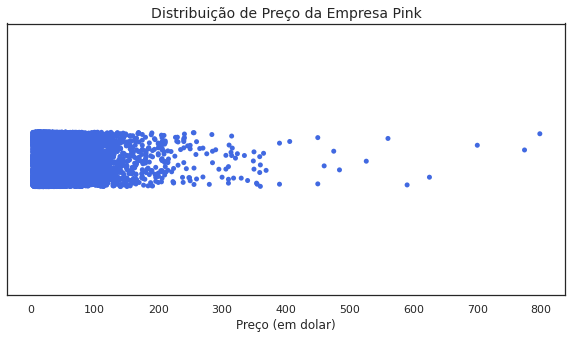

In [18]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de Preço da Empresa Pink',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=='pink'],
             color='royalblue')
plt.xlabel('Preço (em dolar)');

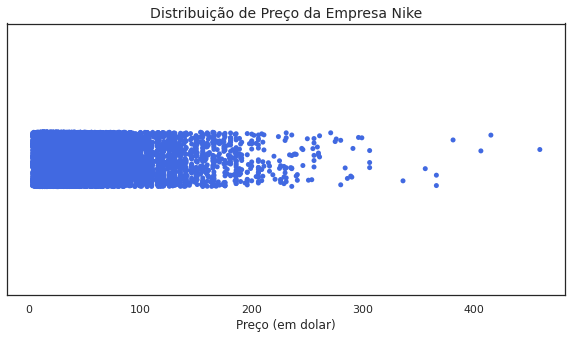

In [19]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de Preço da Empresa Nike',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=='nike'],
             color='royalblue')
plt.xlabel('Preço (em dolar)');

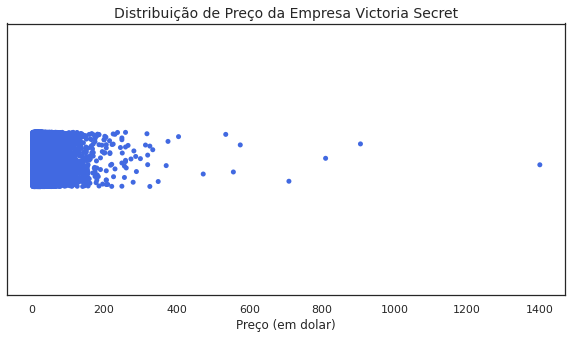

In [20]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de Preço da Empresa Victoria Secret',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=="victoria's secret"],color='royalblue')
plt.xlabel('Preço (em dolar)');

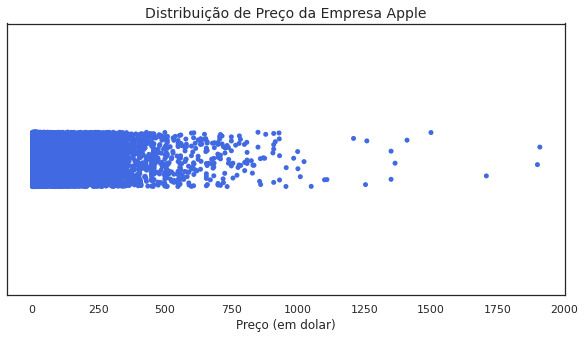

In [21]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de Preço da Empresa Apple',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=="apple"],color='royalblue')
plt.xlabel('Preço (em dolar)');

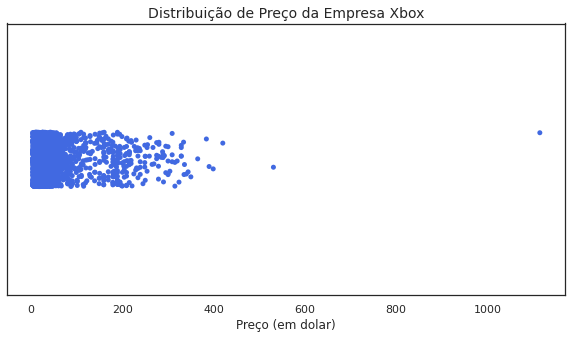

In [22]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de Preço da Empresa Xbox',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=="xbox"],color='royalblue')
plt.xlabel('Preço (em dolar)');

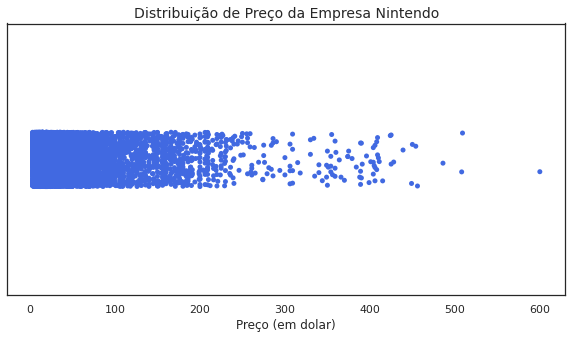

In [23]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de Preço da Empresa Nintendo',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=="nintendo"],
             color='royalblue')
plt.xlabel('Preço (em dolar)');

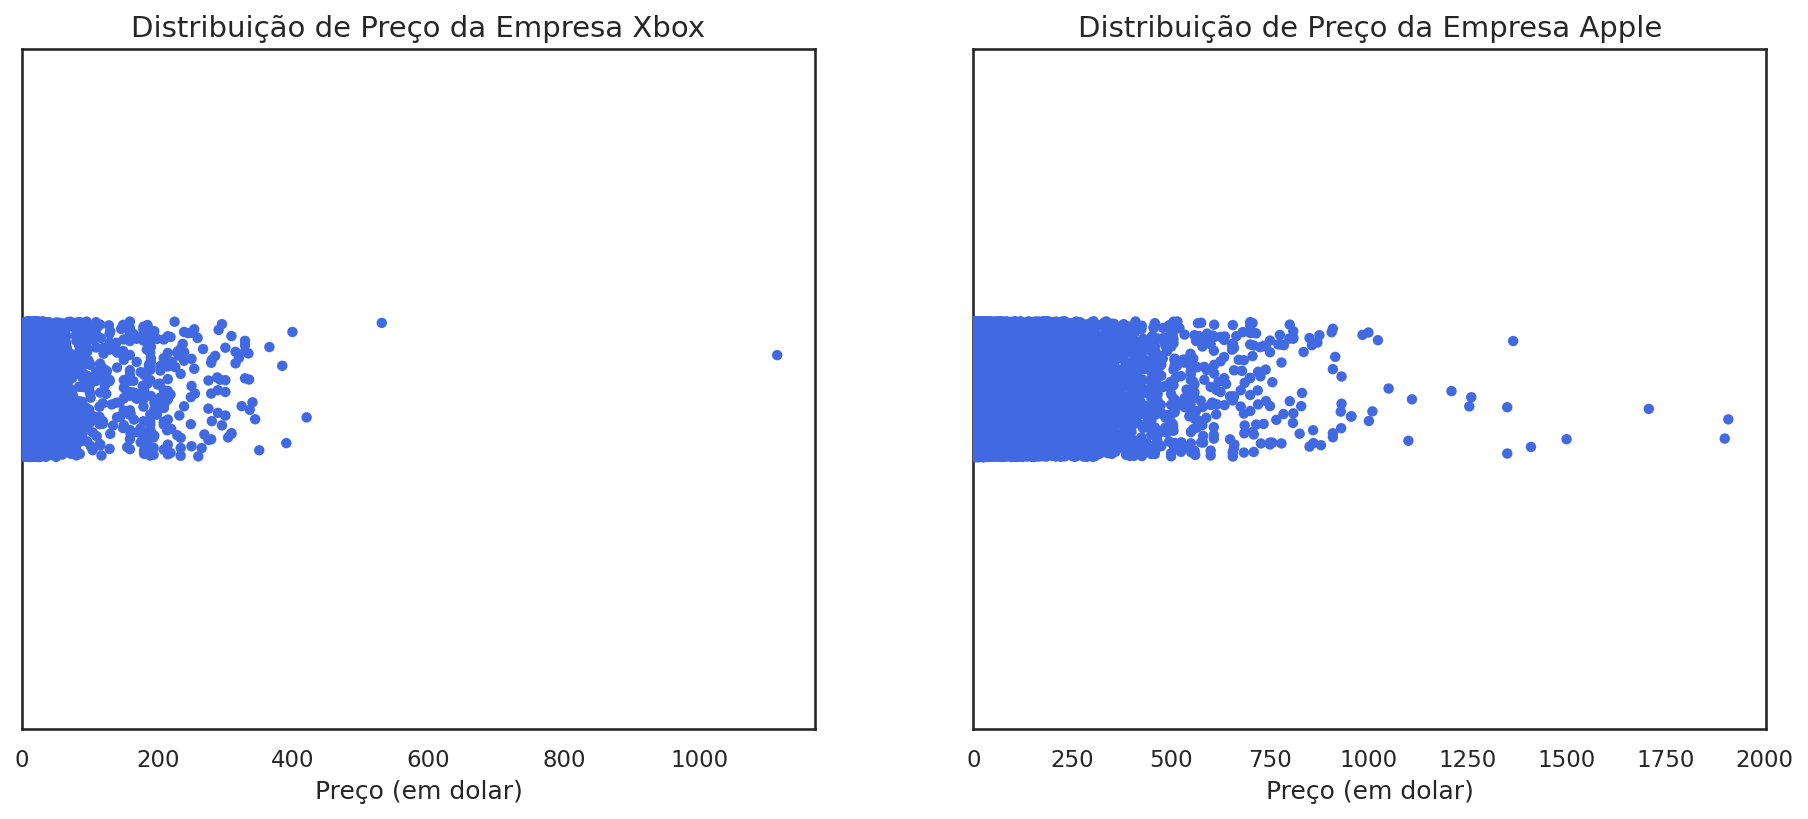

In [24]:
plt.figure(figsize=(15,6),dpi=150)

plt.subplot(1,2,1)
plt.title('Distribuição de Preço da Empresa Xbox',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=="xbox"],color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.xlim(left=0)

plt.subplot(1,2,2)
plt.title('Distribuição de Preço da Empresa Apple',fontsize=14)
sns.stripplot(x='price',data=df[df['brand_name']=="apple"],color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.xlim(left=0);

In [25]:
pre_min = df.groupby('brand_name').min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


In [26]:
pre_min[pre_min['price']>100]

,train_id,name,item_condition_id,price,shipping
brand_name,,,,,
alyce paris,142142,Red prom dress or homecoming dress,2,200.0,1
anderson bean,1333859,Ostrich Skin Boots,3,109.0,0
auto meter,474617,87-93 mustang Auto Meter gauges,2,344.0,0
blendtec,95567,Blendtec Designer 625 Blender,1,134.0,0
brake & wheel parts,327182,Snap On 1/2 Torgue wrench 40-250ft Lb,2,120.0,0
brazilroxx,1037731,Authentic Brahmin Handbag,3,181.0,0
brioni,1401446,Brioni boots,3,200.0,1
bully dog,189508,Bully dog programmer,2,120.0,1
catit,472404,Catit Cat Litter box+Genie refills+more,2,119.0,0


In [27]:
pre_min[pre_min['price']>100].shape

(35, 5)

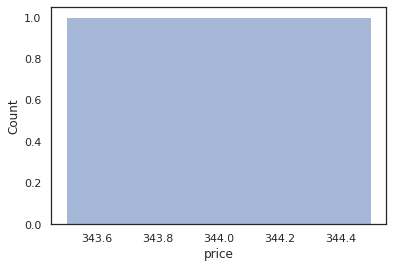

In [28]:
sns.histplot(x='price',data=df[df['brand_name']=="auto meter"],
             kde=True)

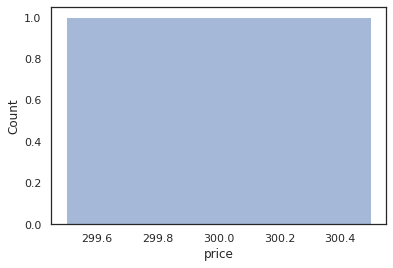

In [29]:
sns.histplot(x='price',data=df[df['brand_name']=="oris"],
             kde=True)

In [30]:
df['category_name'].value_counts()[0:20]

Women/Athletic Apparel/Pants, Tights, Leggings                 60152
Women/Tops & Blouses/T-Shirts                                  46349
Beauty/Makeup/Face                                             34320
Beauty/Makeup/Lips                                             29901
Electronics/Video Games & Consoles/Games                       26547
Beauty/Makeup/Eyes                                             25200
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24668
Women/Underwear/Bras                                           21254
Women/Tops & Blouses/Tank, Cami                                20270
Women/Tops & Blouses/Blouse                                    20269
Women/Dresses/Above Knee, Mini                                 20068
Women/Jewelry/Necklaces                                        19750
Women/Athletic Apparel/Shorts                                  19518
Beauty/Makeup/Makeup Palettes                                  19091
Women/Shoes/Boots                 

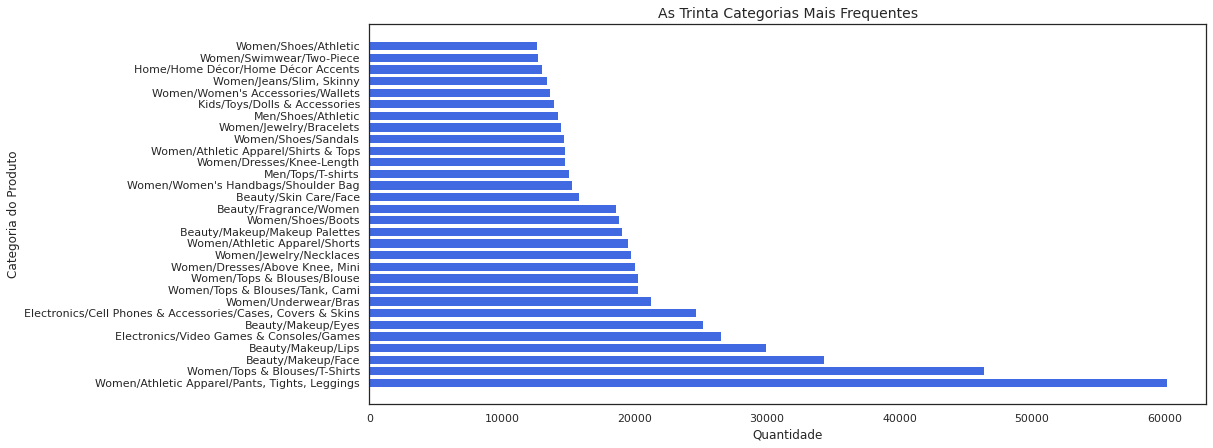

In [31]:
plt.figure(figsize=(15,7))
plt.title('As Trinta Categorias Mais Frequentes',fontsize=14)
plt.barh(df['category_name'].value_counts().index[0:30],df['category_name'].value_counts()[0:30],
         color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Categoria do Produto');

Fazendo uma análise dos valores nulos para tentar agrupa-los

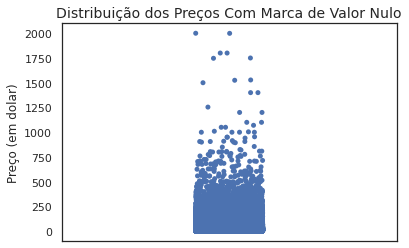

In [32]:
plt.title('Distribuição dos Preços Com Marca de Valor Nulo',fontsize=14)
sns.stripplot(y='price',data=df[df['brand_name'].isnull()])
plt.ylabel('Preço (em dolar)');

In [33]:
df[df['brand_name'].isnull()]['category_name'].value_counts()[0:30]

Women/Athletic Apparel/Pants, Tights, Leggings                  23716
Electronics/Cell Phones & Accessories/Cases, Covers & Skins     17622
Women/Tops & Blouses/T-Shirts                                   13721
Women/Jewelry/Necklaces                                         13632
Beauty/Makeup/Eyes                                              11471
Beauty/Makeup/Lips                                              10942
Beauty/Makeup/Face                                               9628
Home/Home Décor/Home Décor Accents                               9423
Beauty/Skin Care/Face                                            9390
Women/Jewelry/Rings                                              7977
Other/Other/Other                                                7901
Women/Dresses/Above Knee, Mini                                   7748
Women/Shoes/Boots                                                7388
Electronics/Media/DVD                                            7301
Women/Tops & Blouses

## Analisando agora com os dados tratados

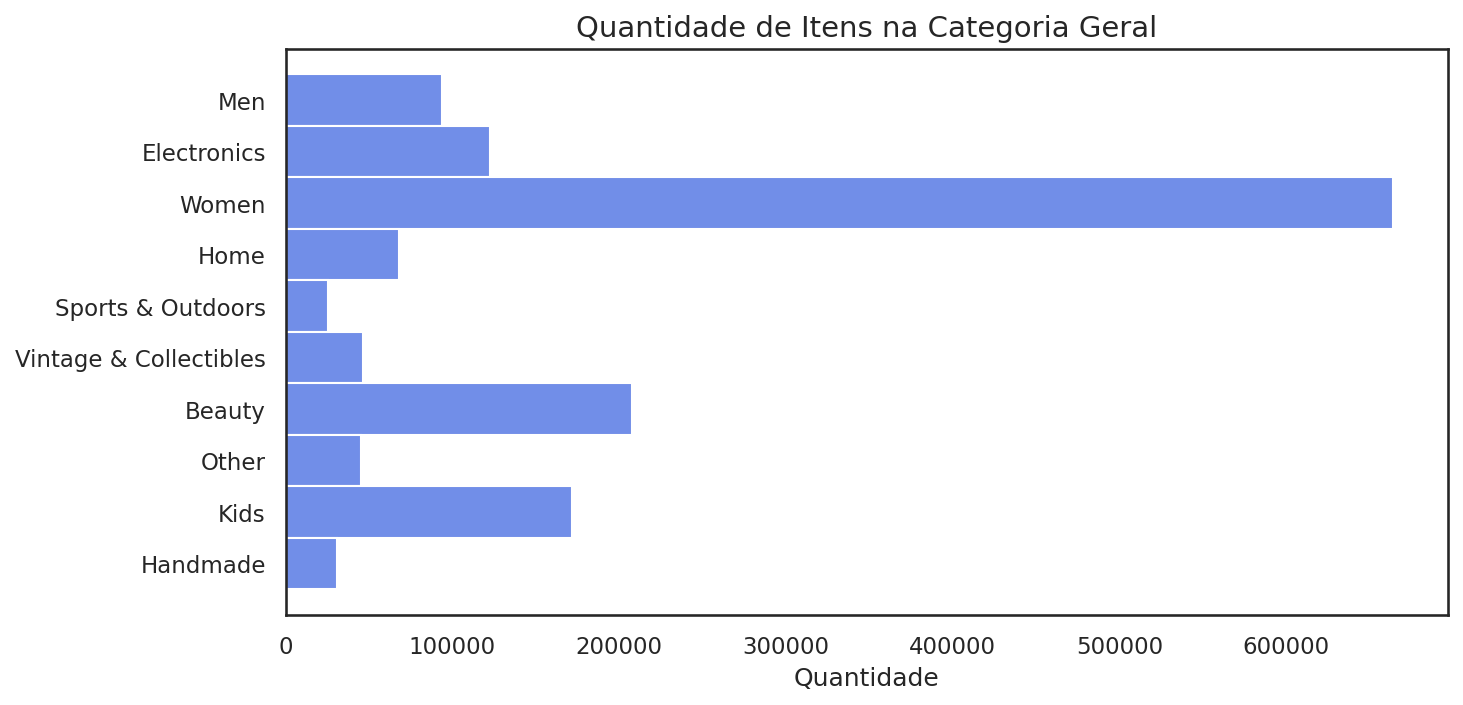

In [34]:
plt.figure(figsize=(10,5),dpi=150)
plt.title('Quantidade de Itens na Categoria Geral',fontsize=14)
sns.histplot(y='category_1',data=df_tra,color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

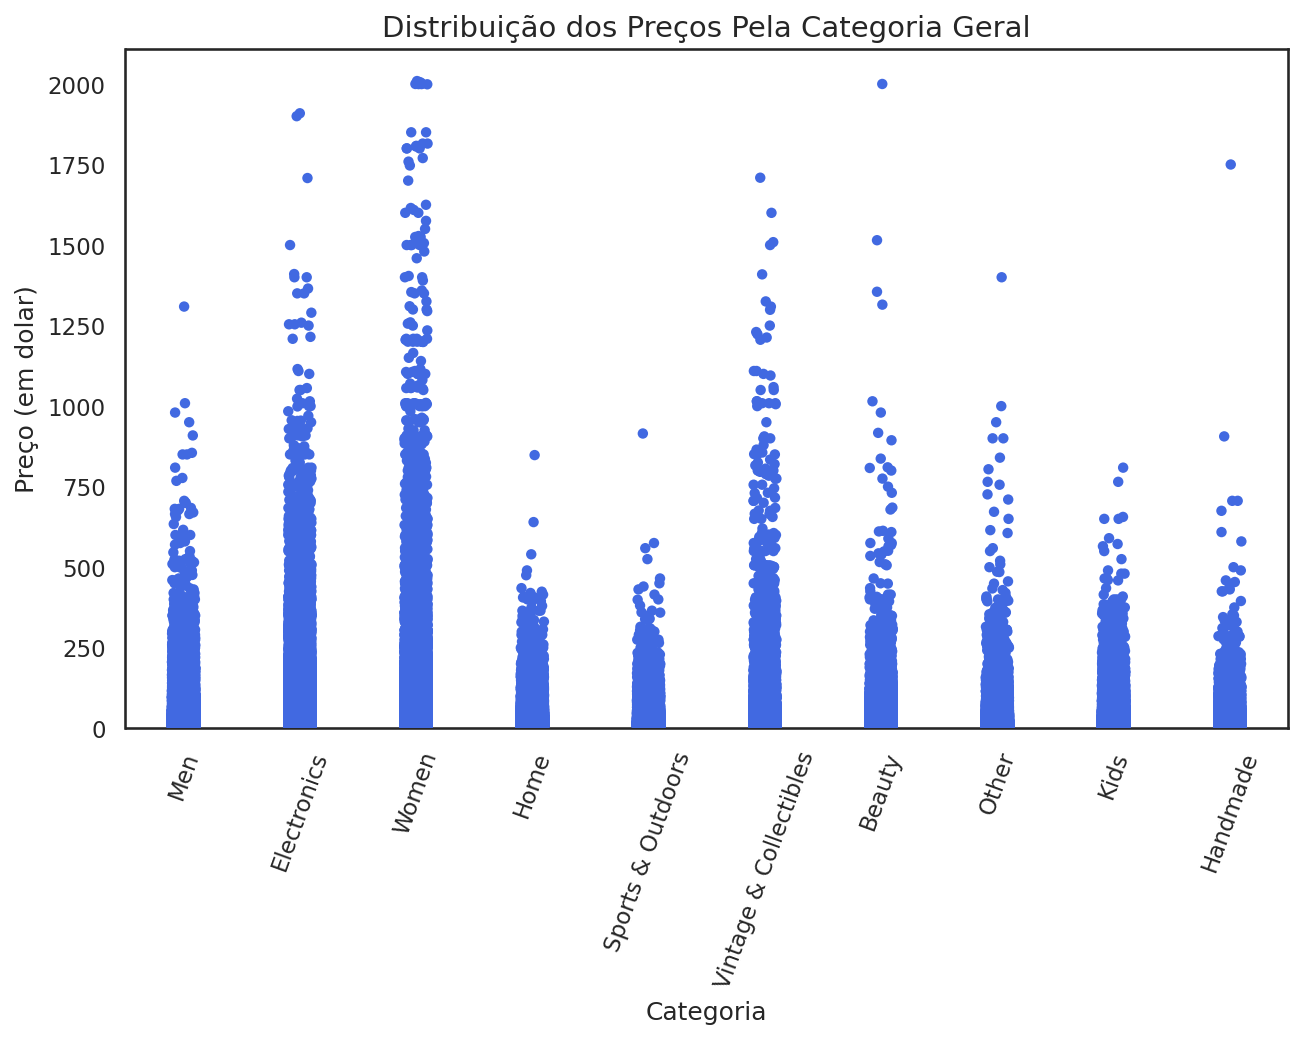

In [35]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Geral',fontsize=14)
sns.stripplot(x='category_1',y='price',data=df_tra,color='royalblue')
plt.ylabel('Preço (em dolar)')
plt.xlabel('Categoria')
plt.xticks(rotation=70)
plt.ylim(bottom=0);

In [36]:
df_tra['category_1'].unique()

array(['Men', 'Electronics', 'Women', 'Home', 'Sports & Outdoors',
       'Vintage & Collectibles', 'Beauty', 'Other', 'Kids', nan,
       'Handmade'], dtype=object)

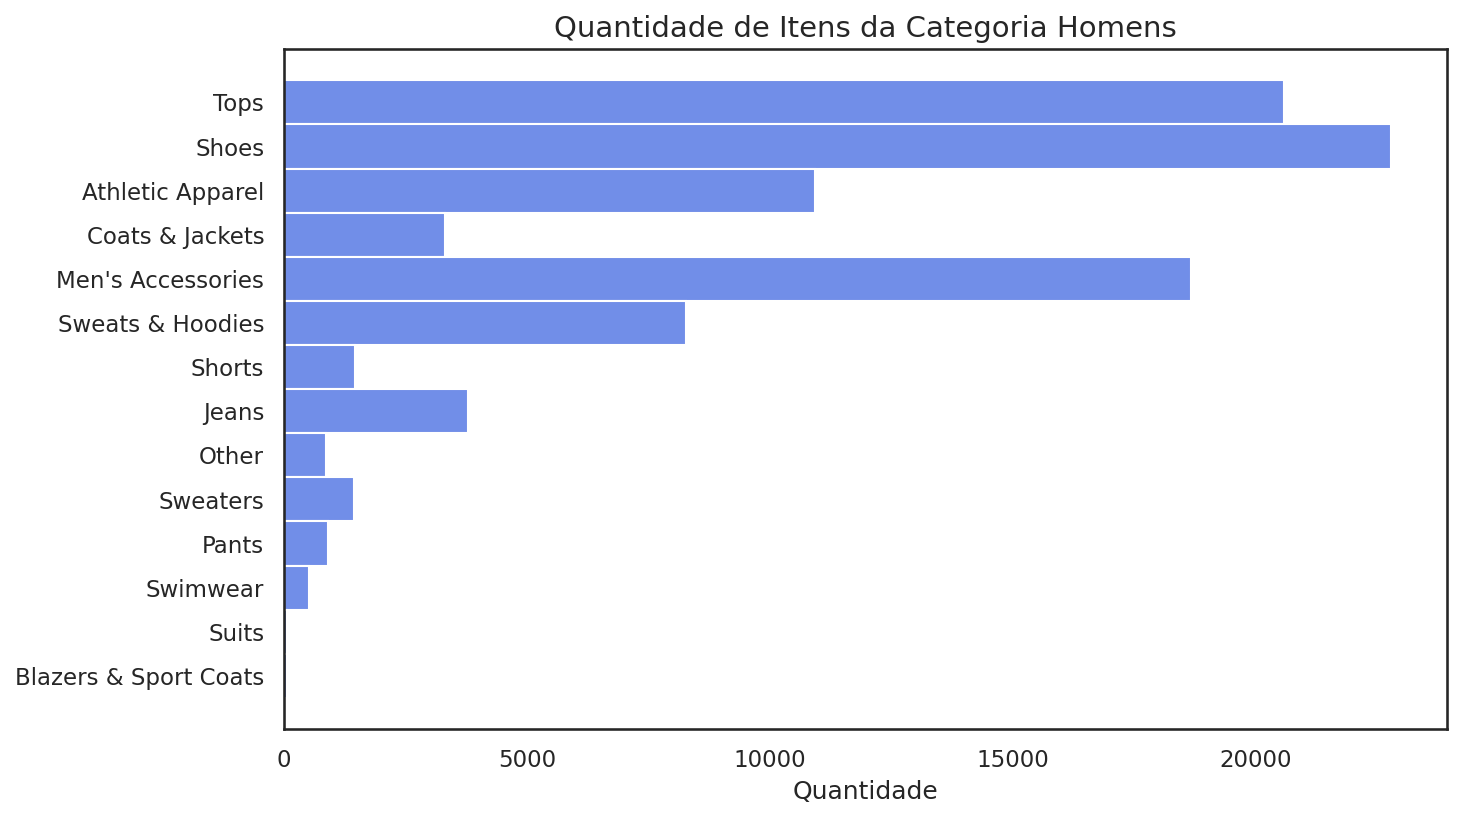

In [54]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Itens da Categoria Homens',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Men'],color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

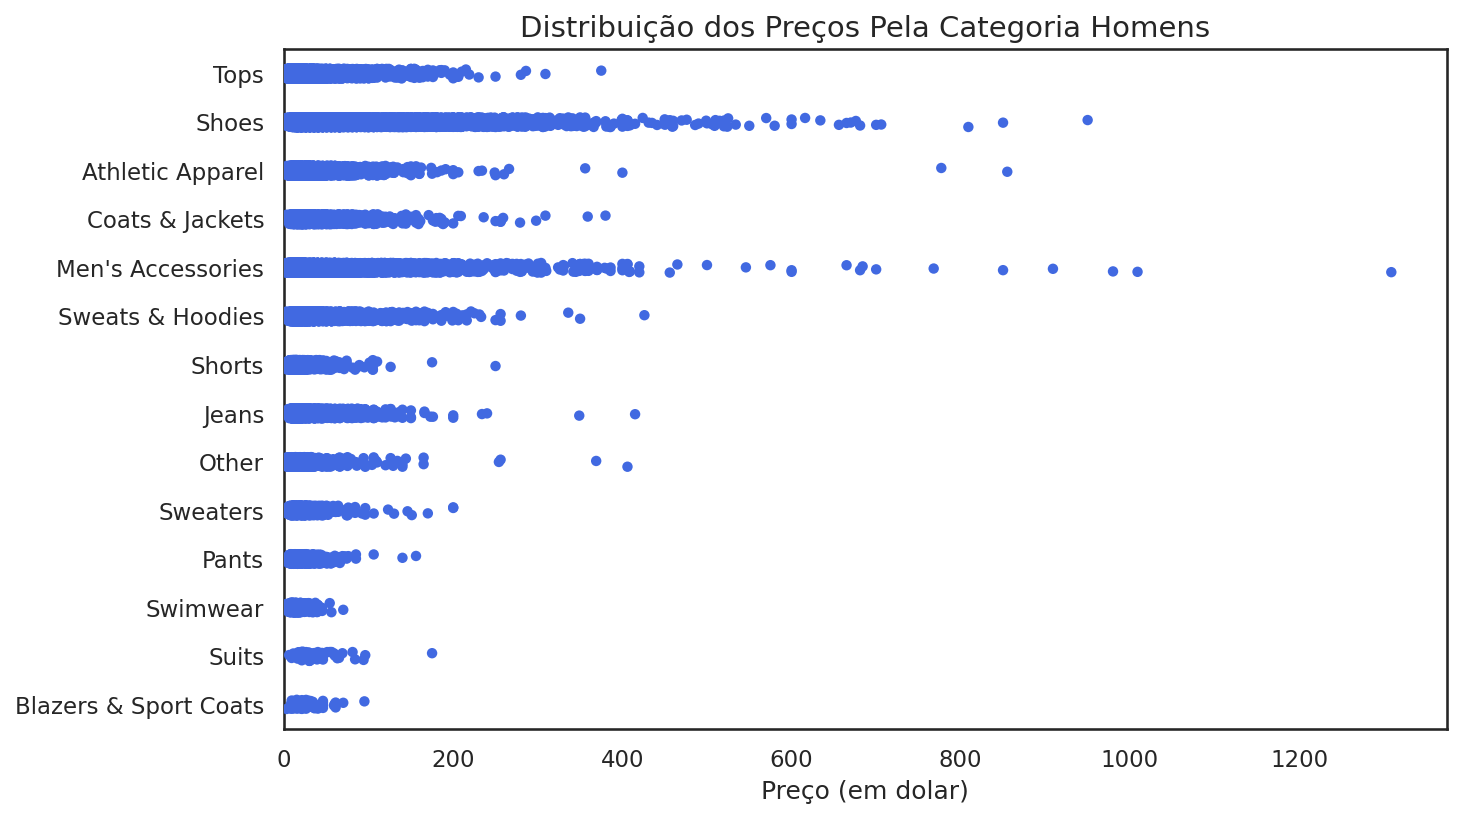

In [59]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Homens',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Men']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

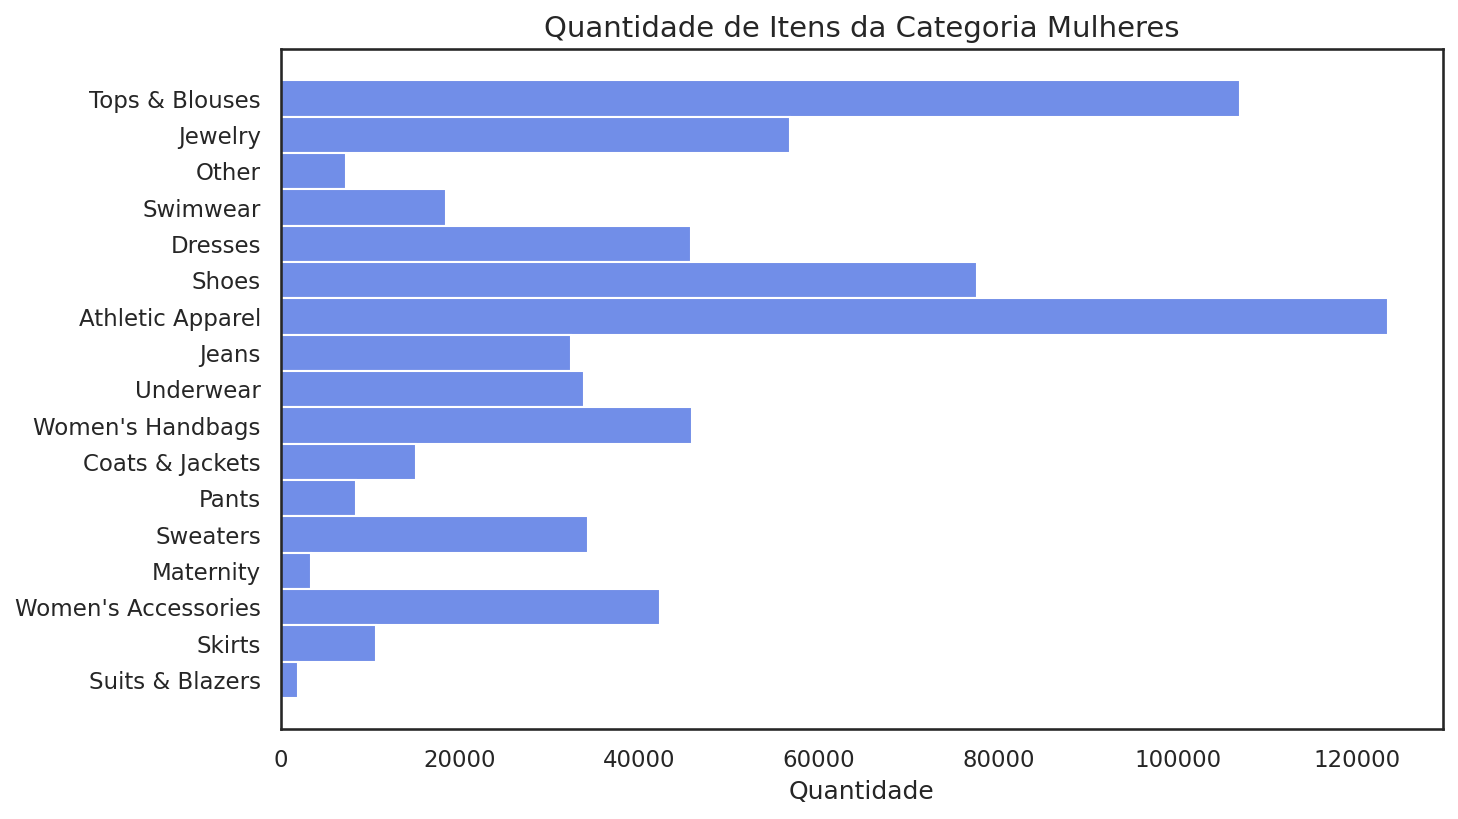

In [51]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Itens da Categoria Mulheres',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Women'],color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

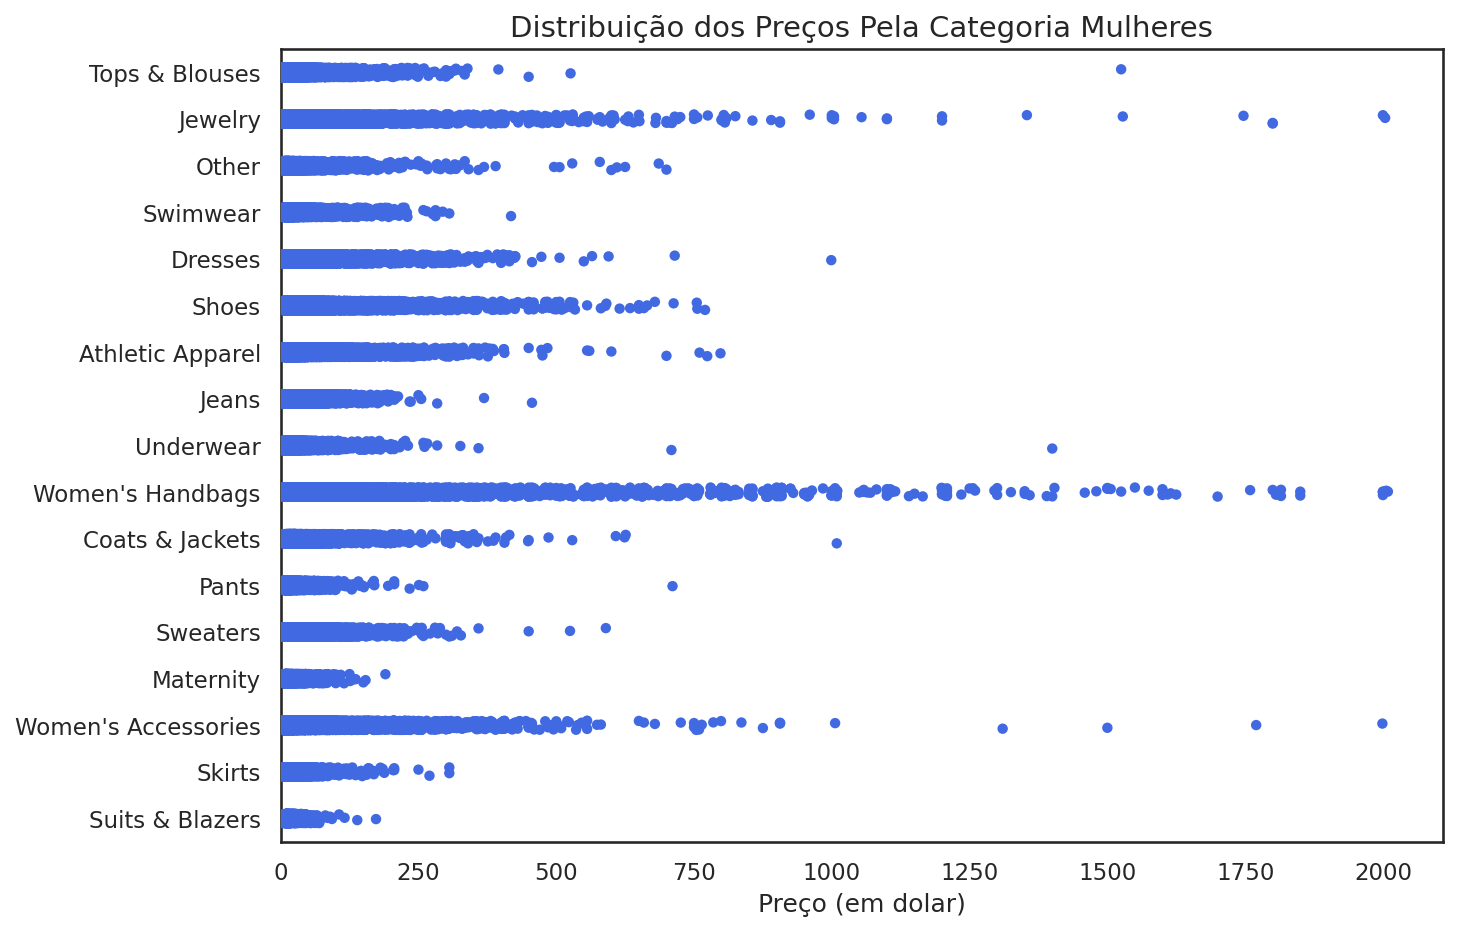

In [40]:
plt.figure(figsize=(10,7),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Mulheres',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Women']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

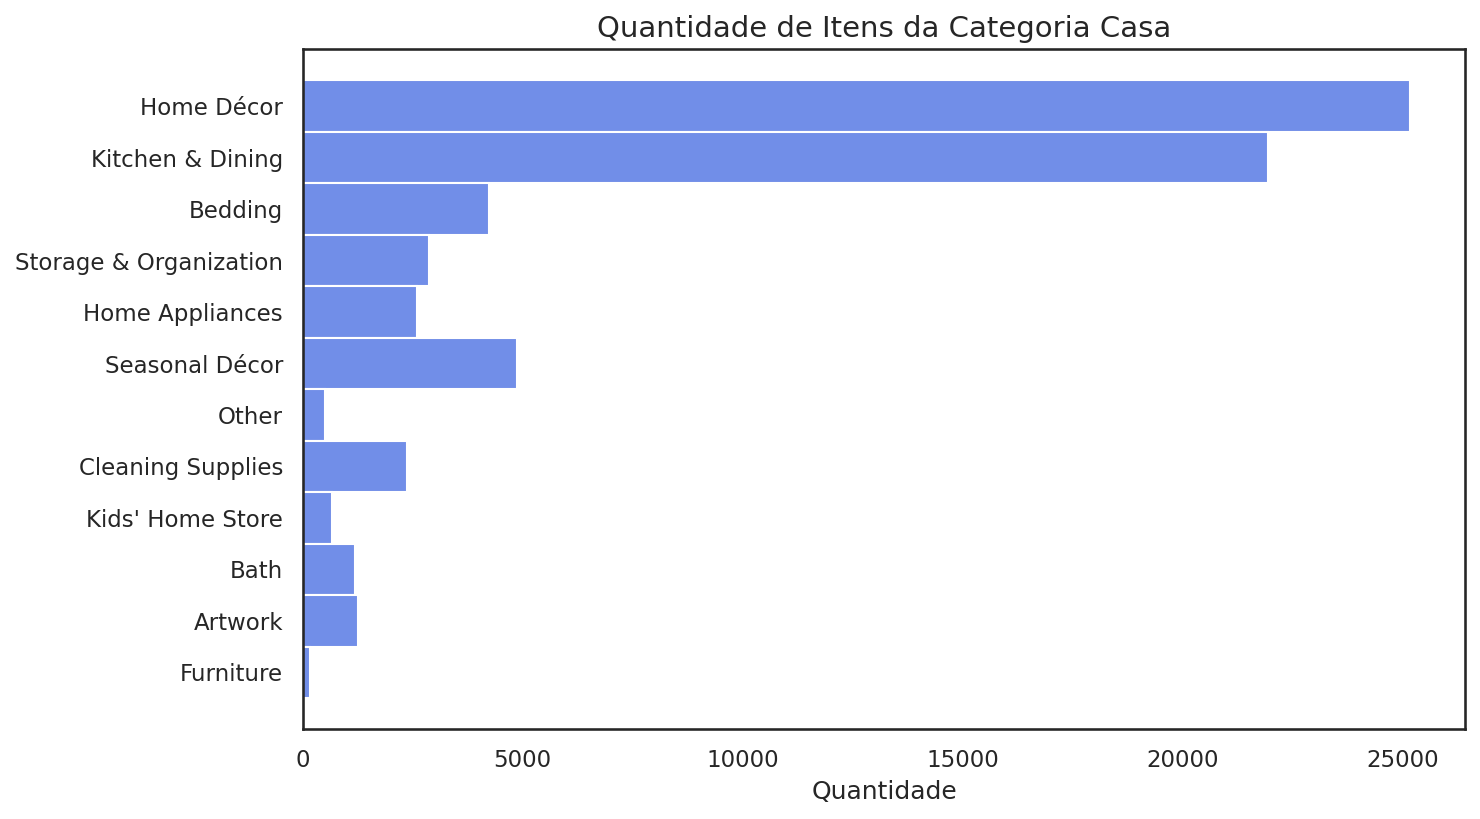

In [64]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Itens da Categoria Casa',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Home'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

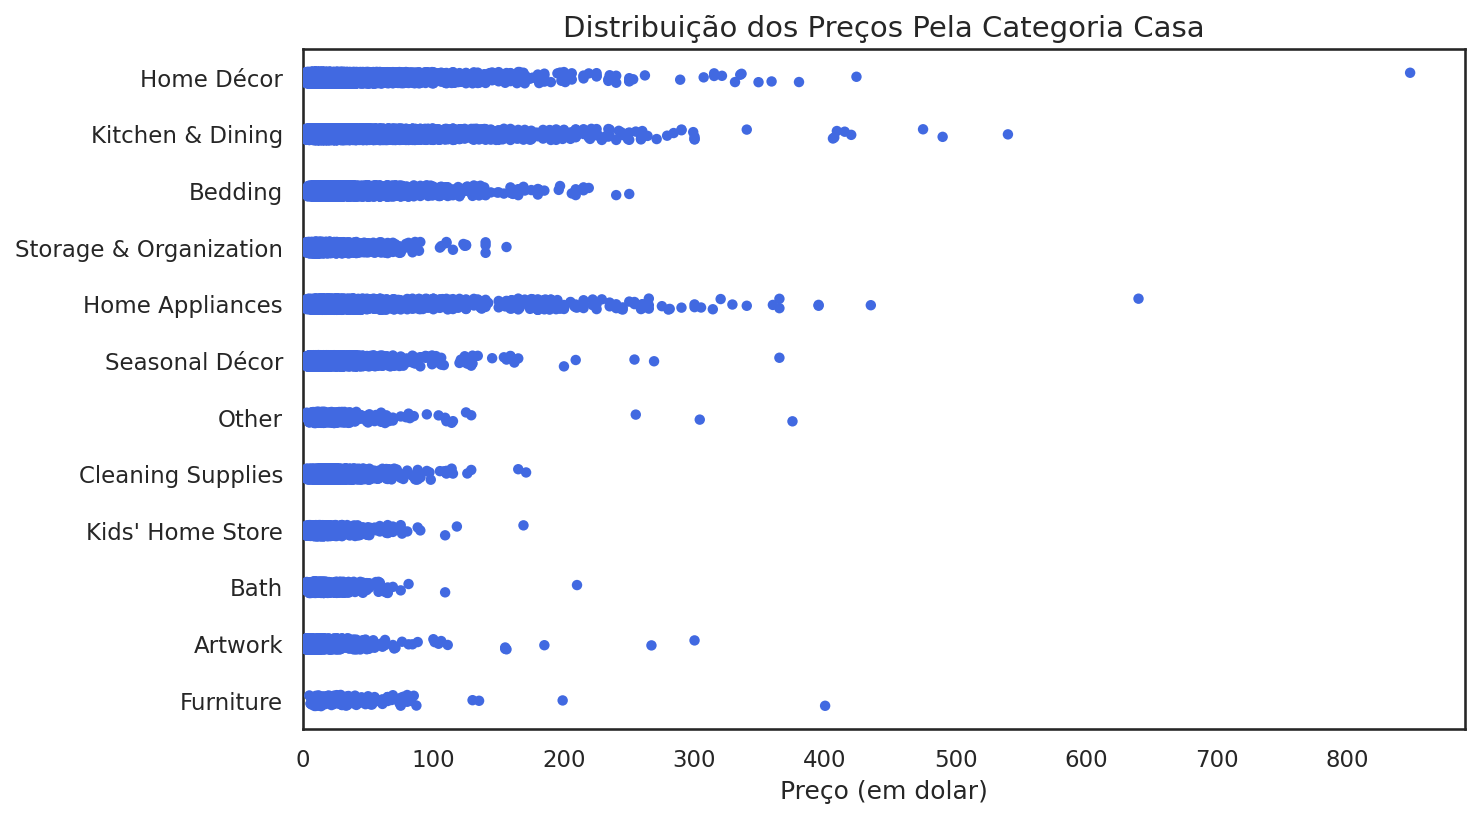

In [65]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Casa',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Home']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

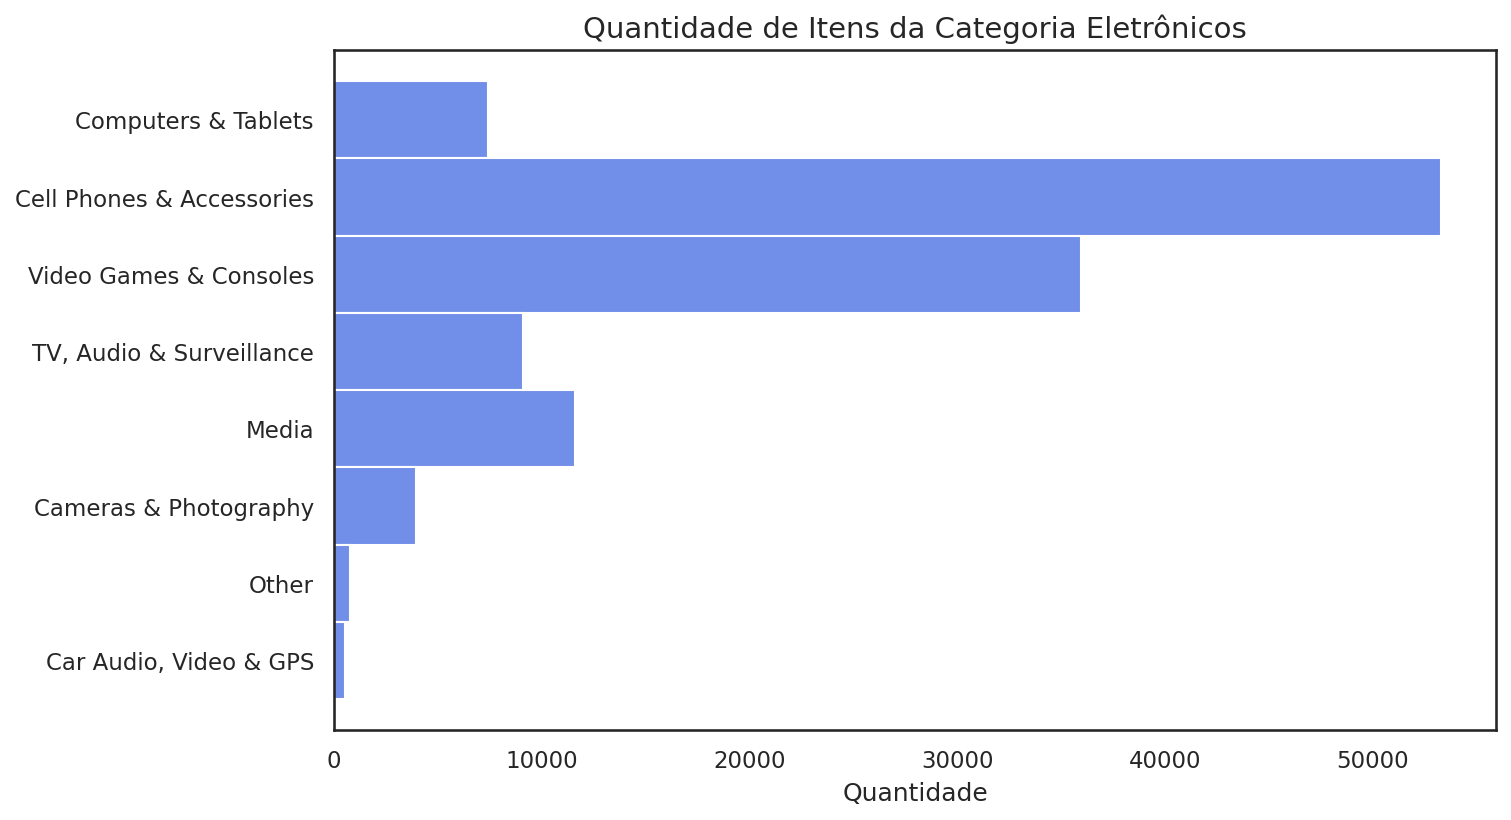

In [60]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Itens da Categoria Eletrônicos',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Electronics'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

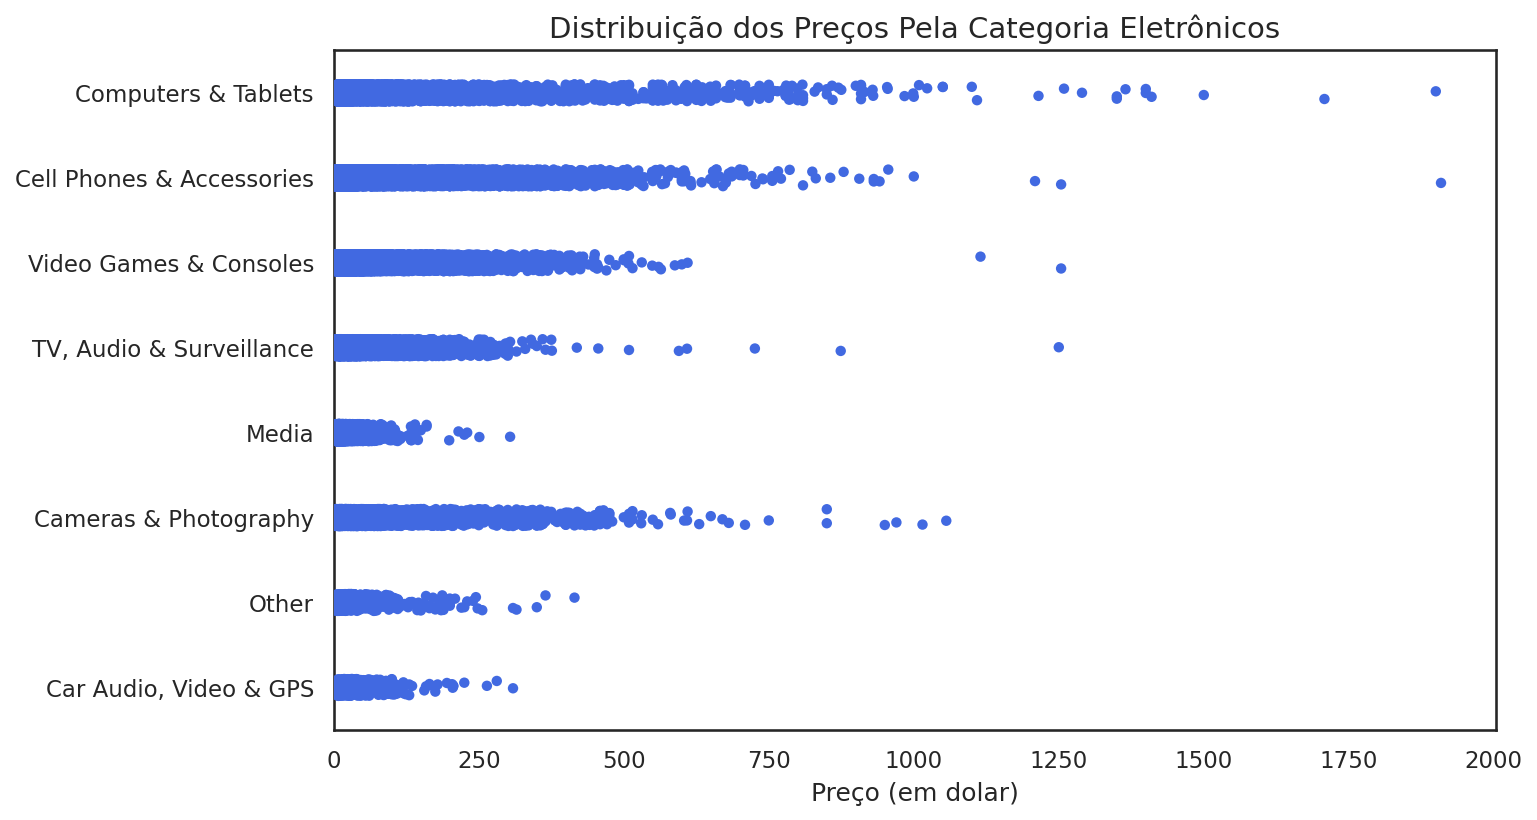

In [62]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Eletrônicos',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Electronics']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

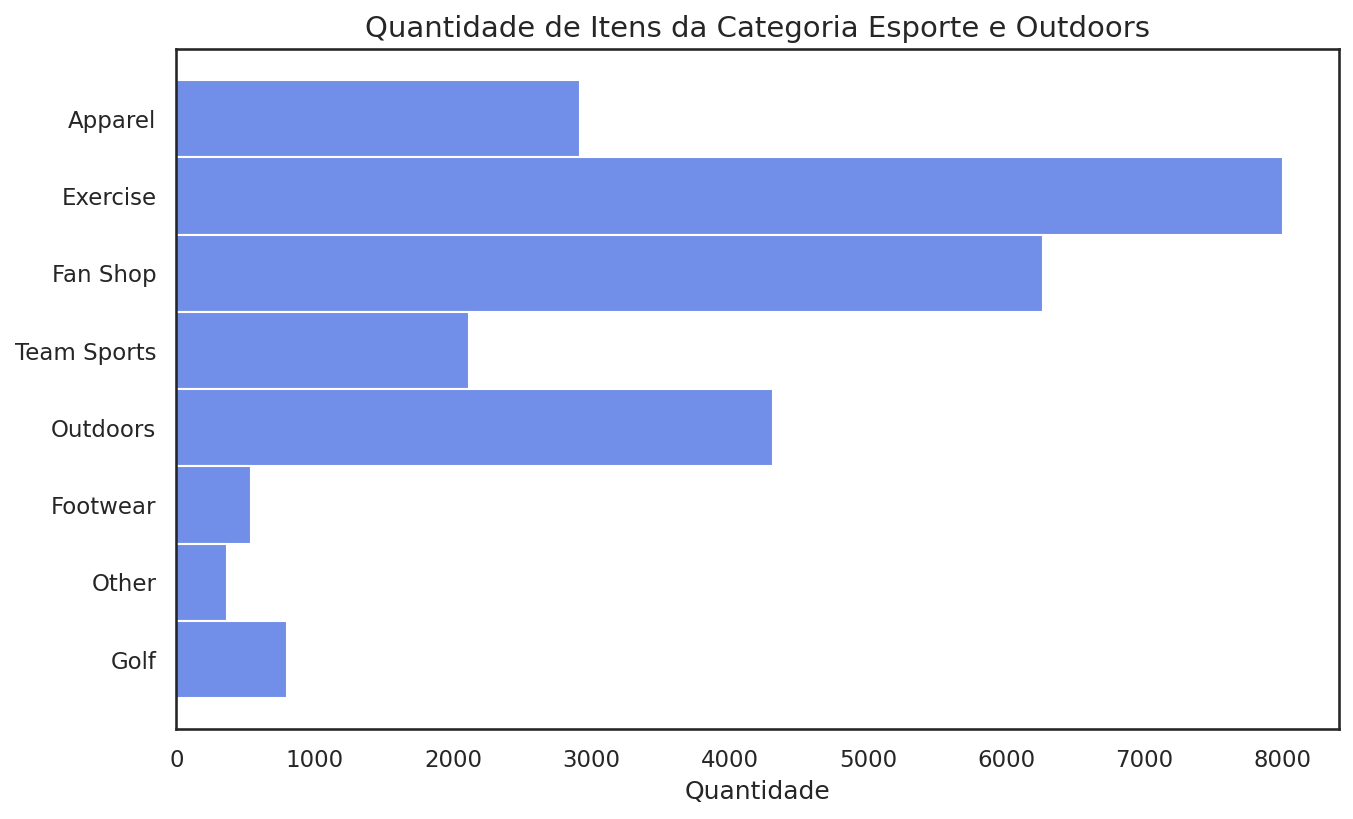

In [68]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Itens da Categoria Esporte e Outdoors',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Sports & Outdoors'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

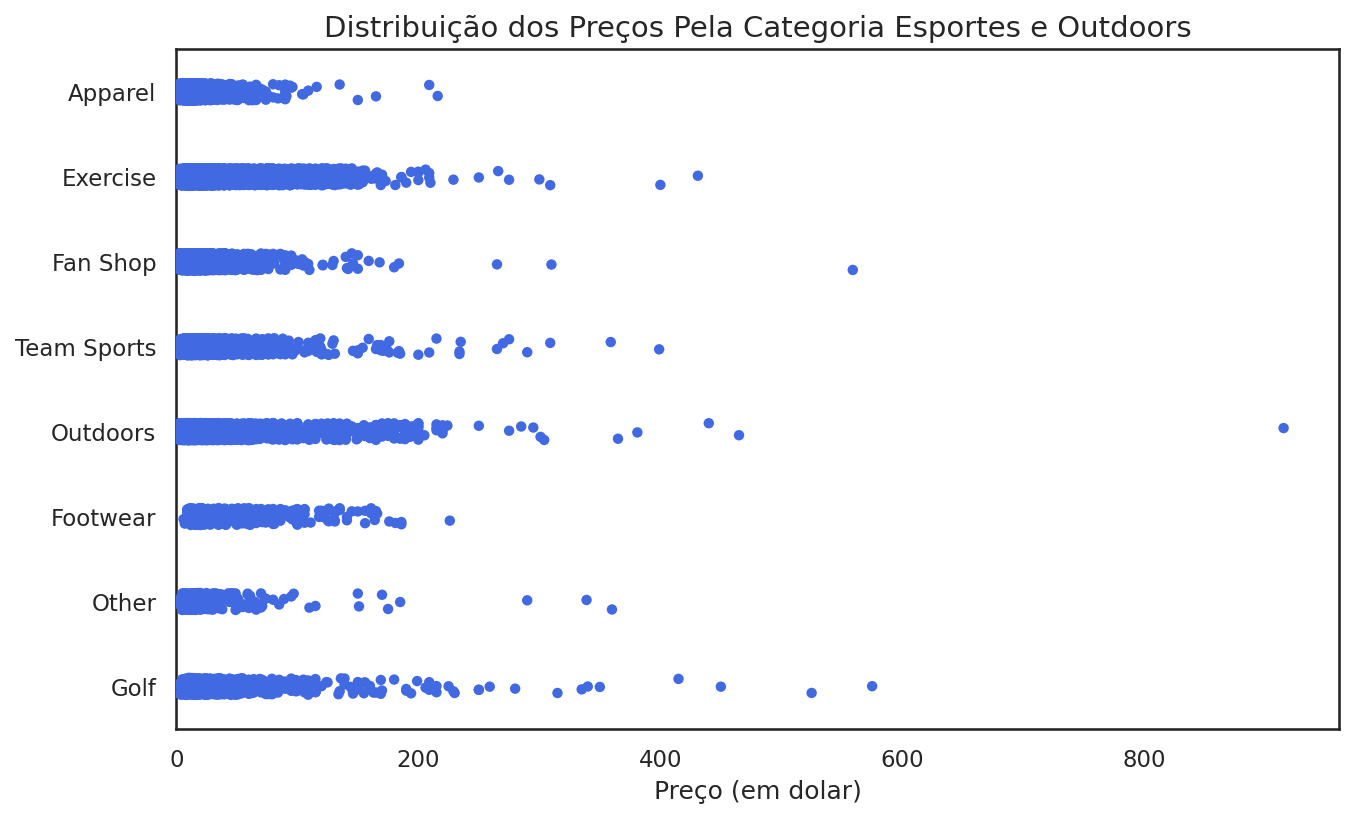

In [69]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Esportes e Outdoors',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Sports & Outdoors']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

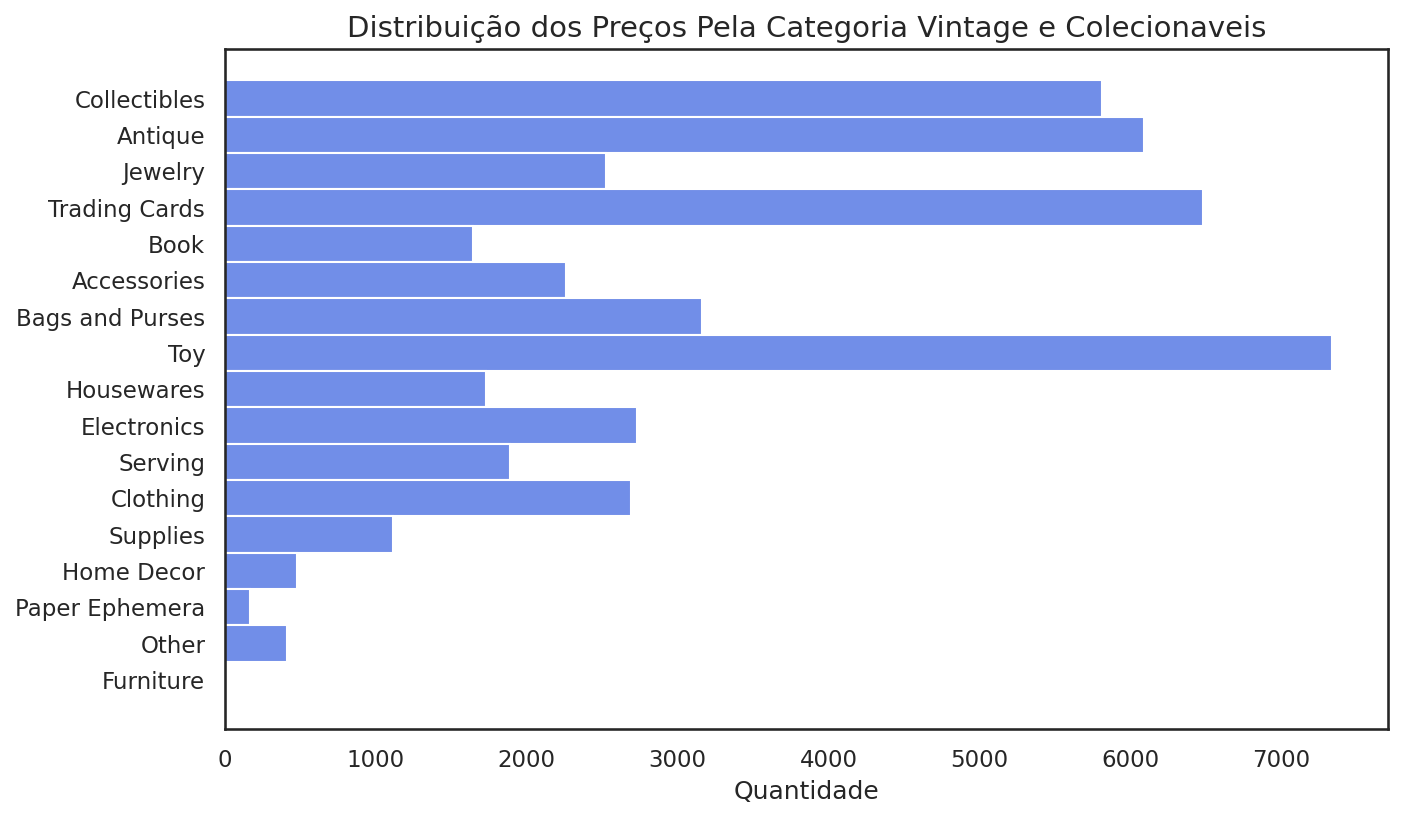

In [70]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Vintage e Colecionaveis',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Vintage & Collectibles'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

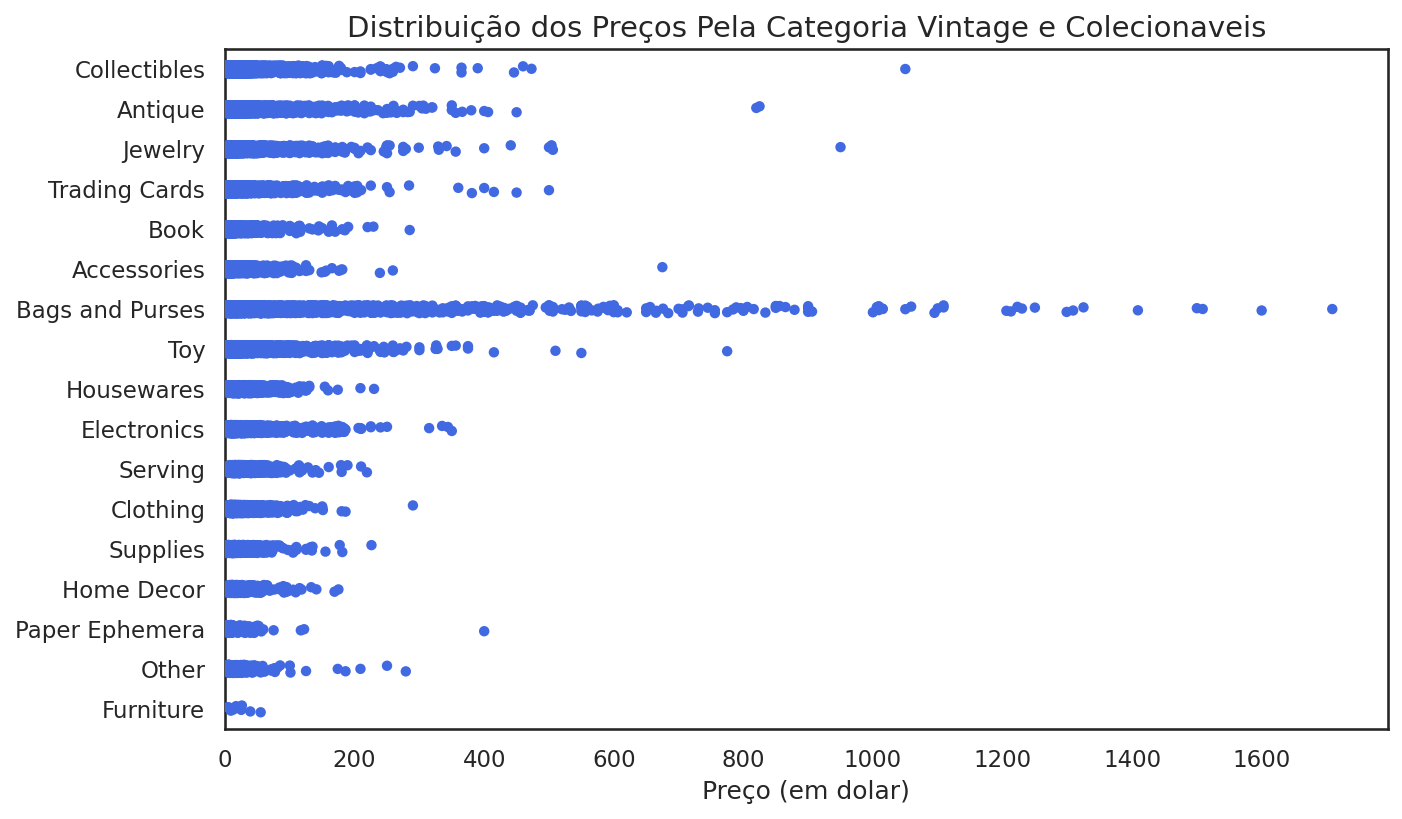

In [71]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Vintage e Colecionaveis',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Vintage & Collectibles']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

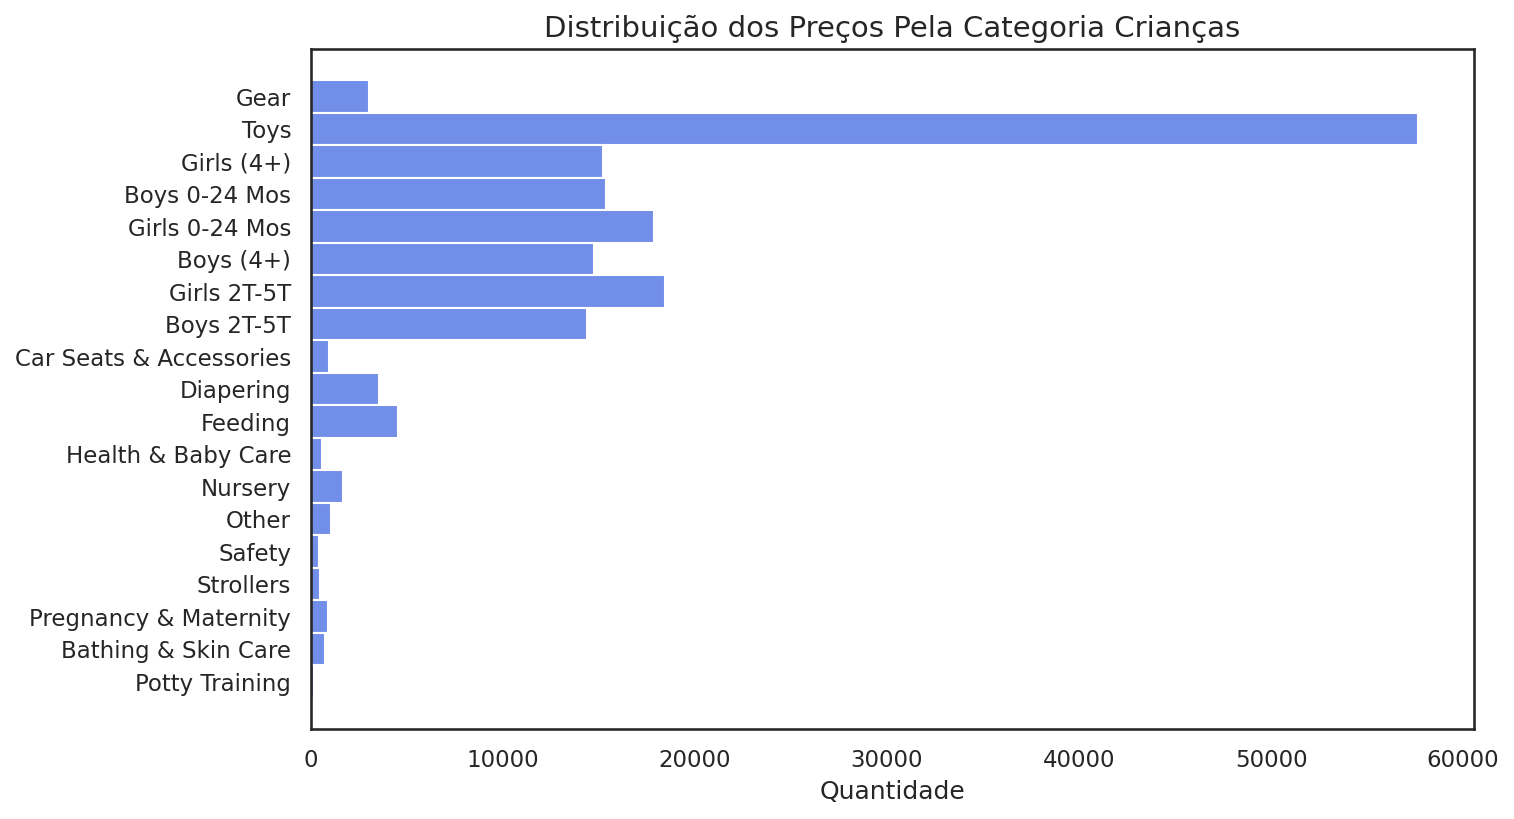

In [73]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Crianças',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Kids'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

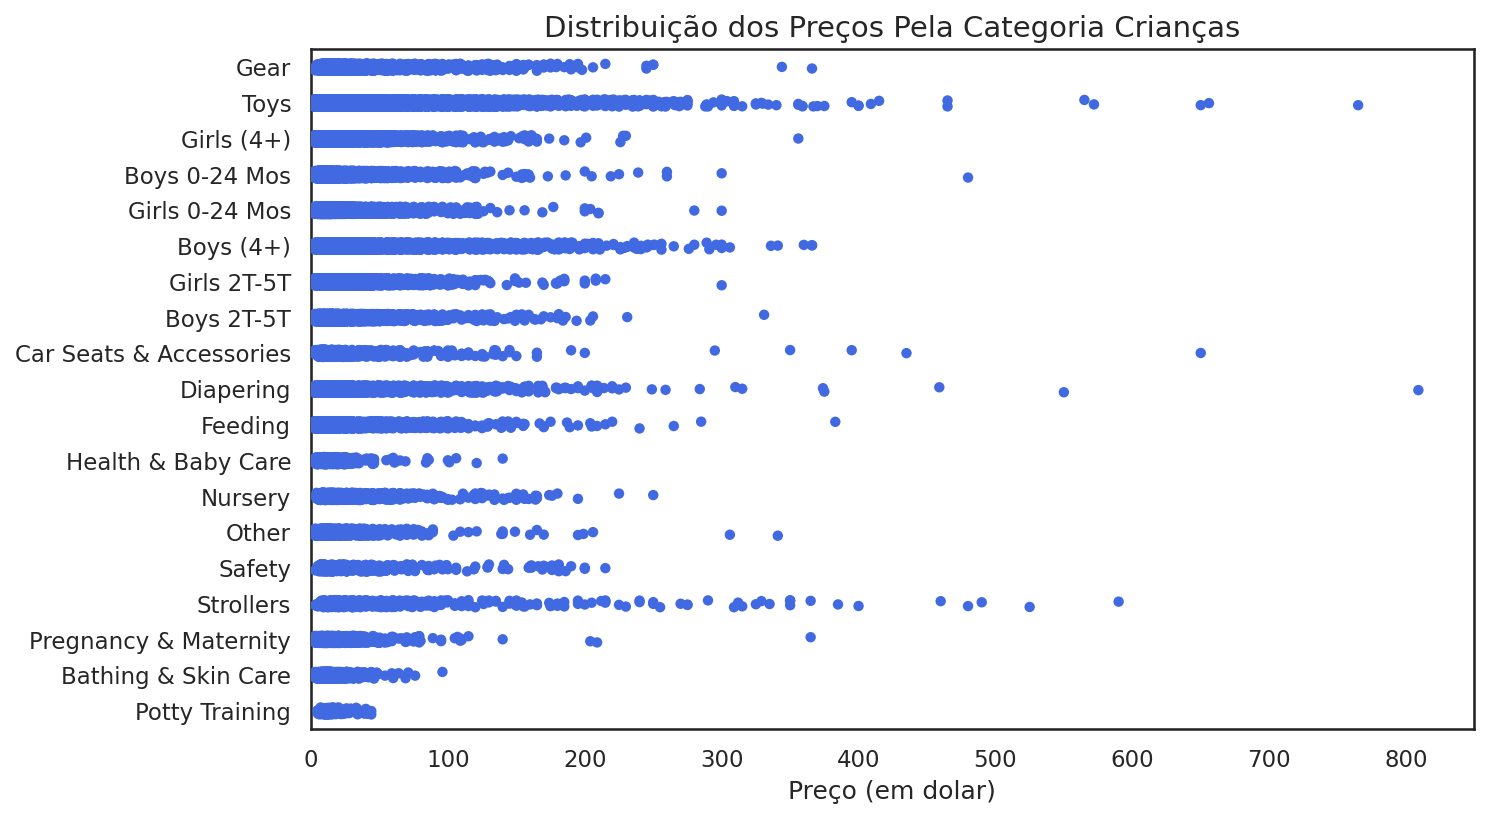

In [74]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Crianças',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Kids']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

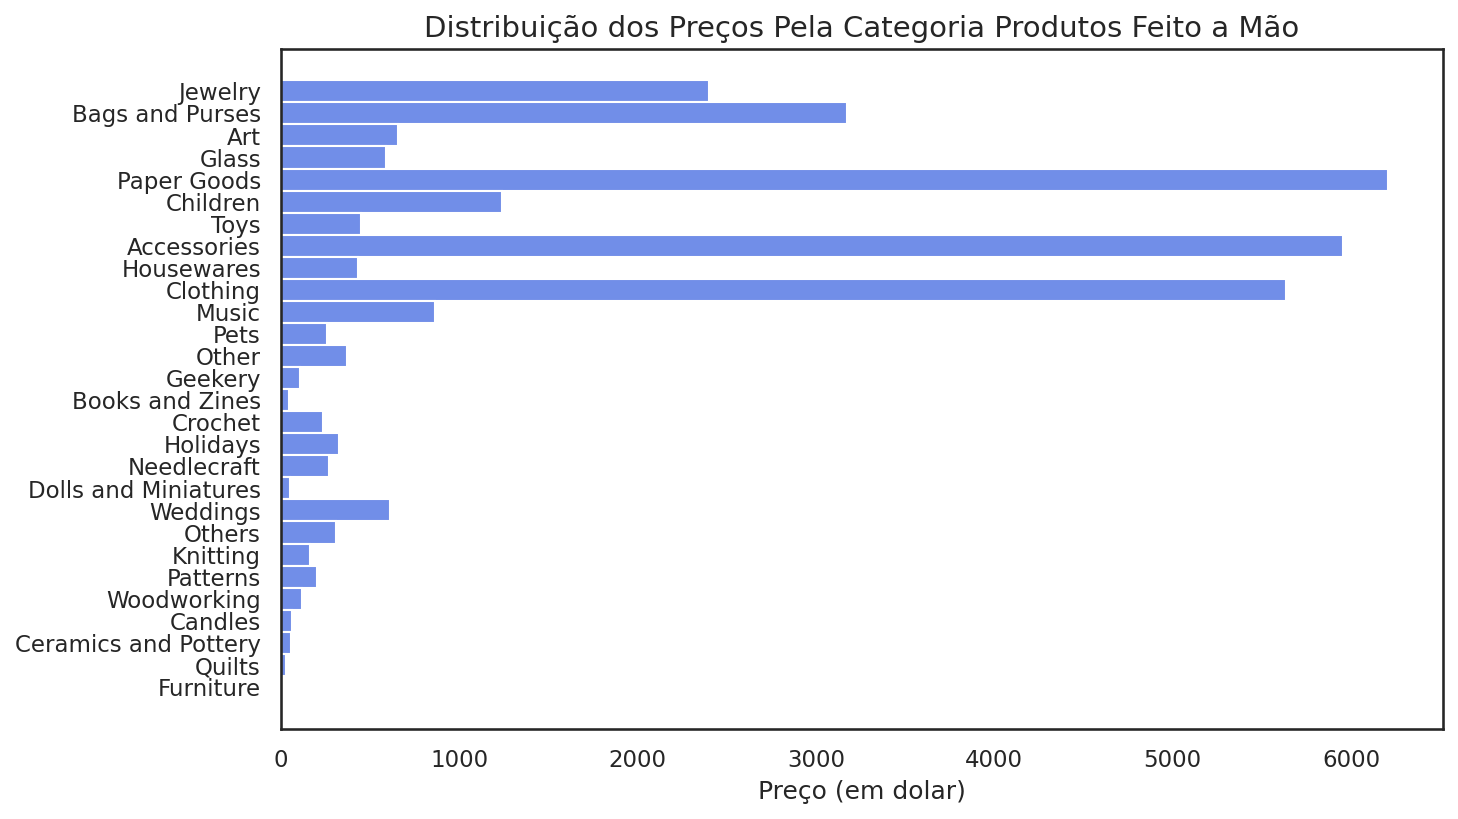

In [75]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Produtos Feito a Mão',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Handmade'],
             color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

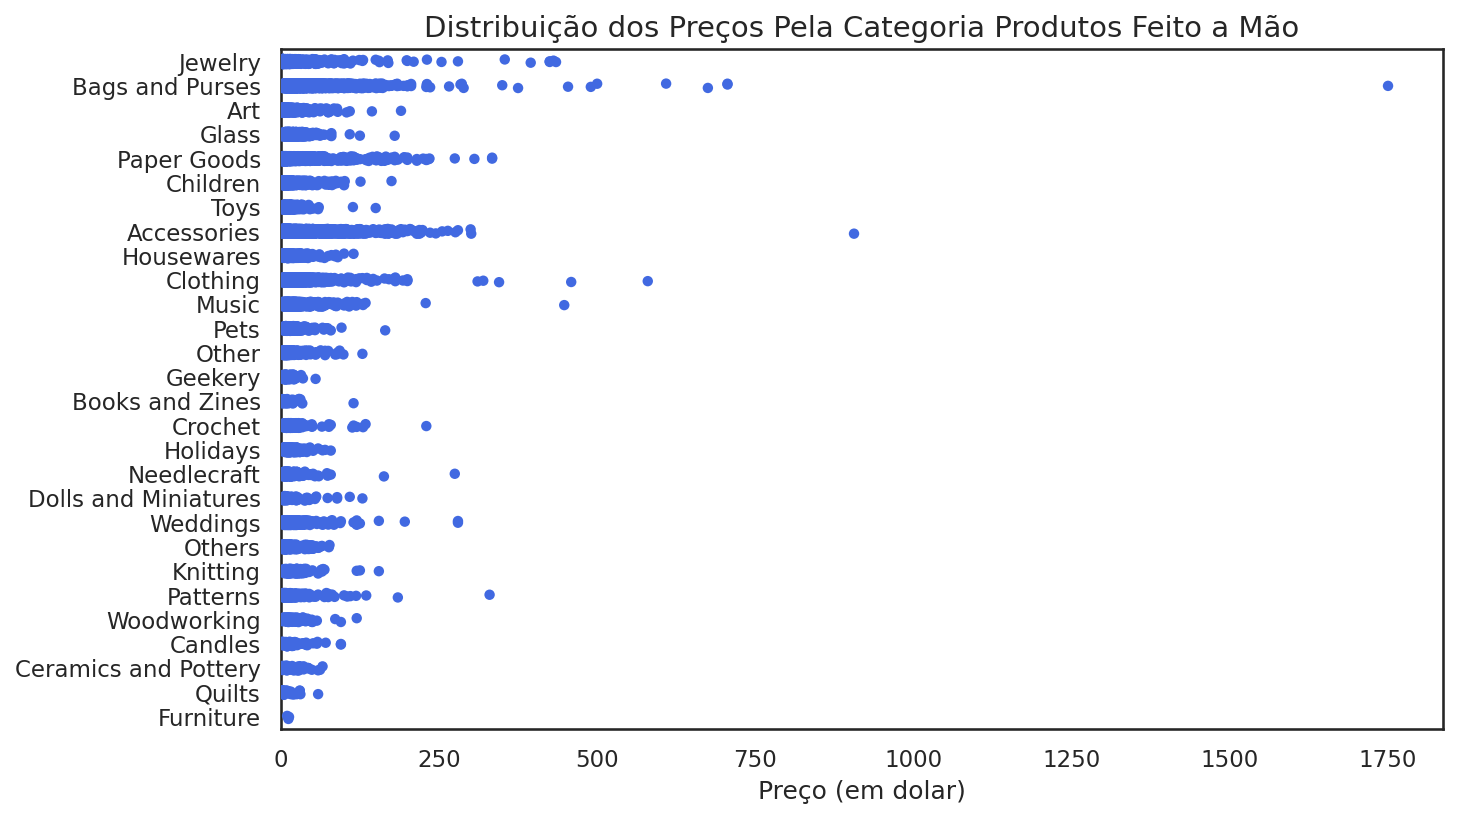

In [76]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Produtos Feito a Mão',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Handmade']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

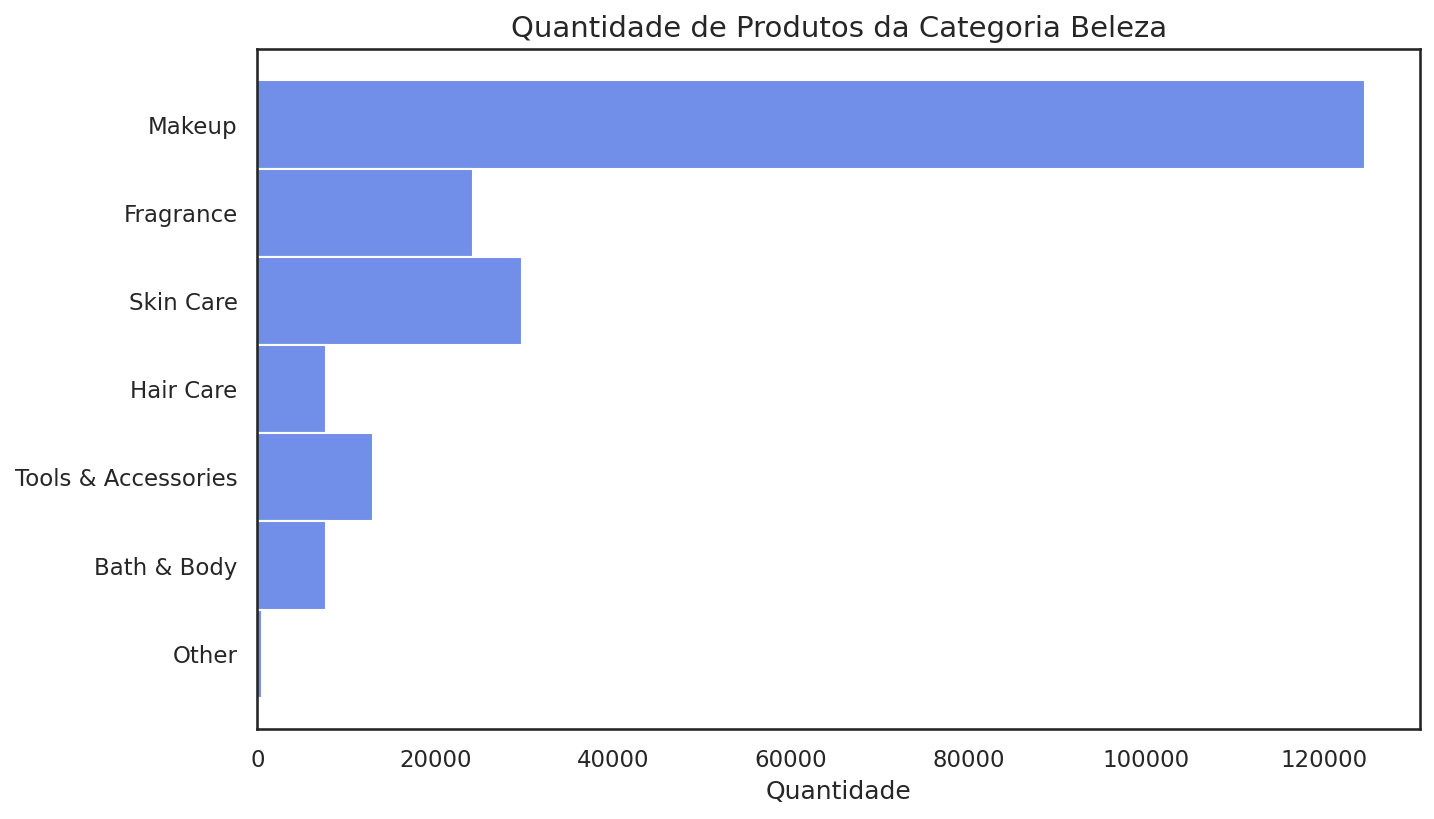

In [55]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos da Categoria Beleza',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Beauty'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

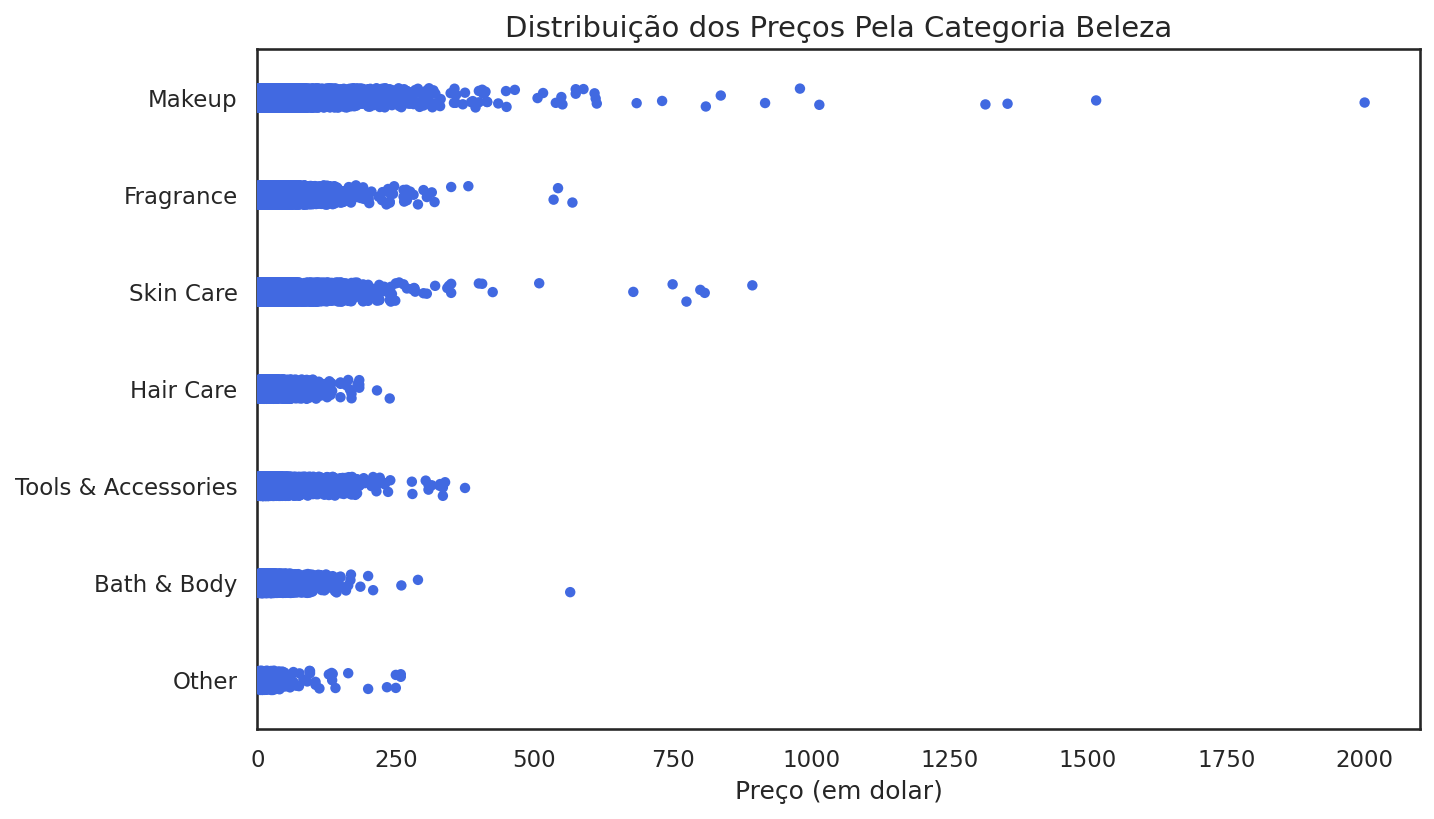

In [53]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Beleza',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Beauty']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);

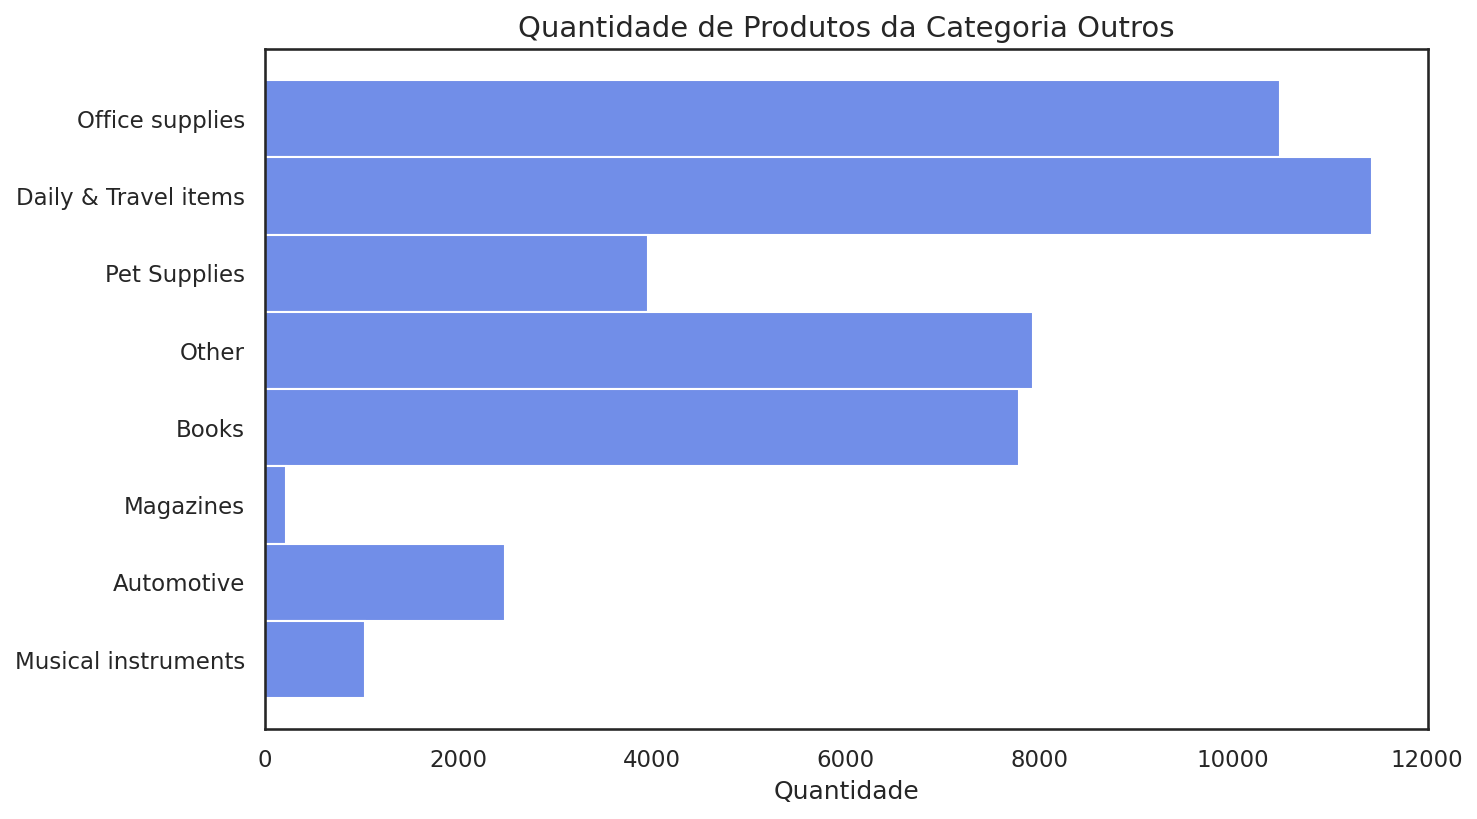

In [77]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos da Categoria Outros',fontsize=14)
sns.histplot(y='category_2',data=df_tra[df_tra['category_1']=='Other'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

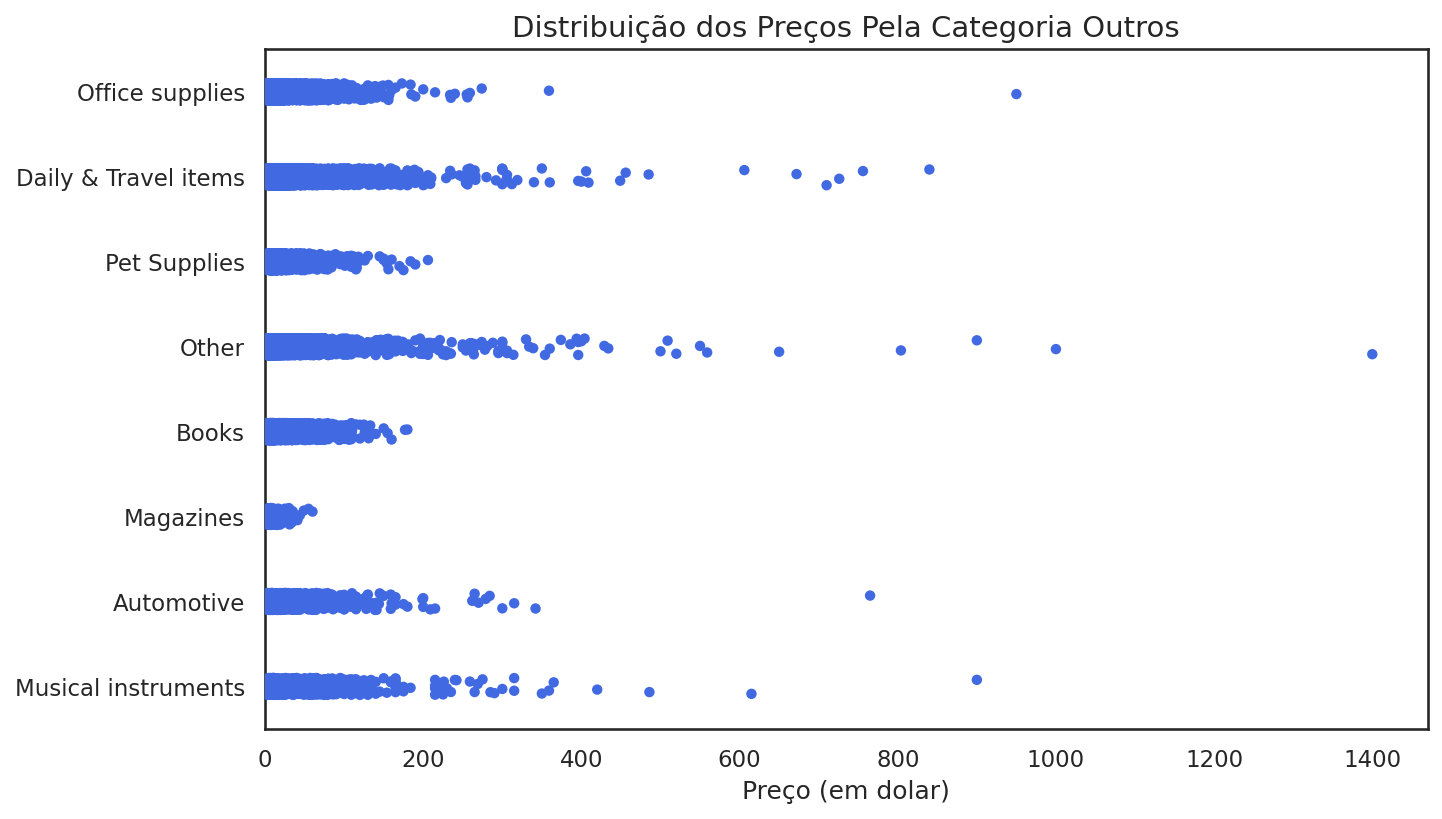

In [78]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição dos Preços Pela Categoria Outros',fontsize=14)
sns.stripplot(y='category_2',x='price',data=df_tra[df_tra['category_1']=='Other']
              ,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('')
plt.xlim(left=0);